<a href="https://colab.research.google.com/github/KimiaDN/Students-Academic-Performance/blob/main/DeepLearning_StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 62.5MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20                      1                         1   
1          25                      1                         1   
2          30                      0                         0   
3          35                      0                         0   
4          50                      0                         0   

   StudentAbsenceDays  Class  
0                   1      2  
1                   1      2  
2                   0      1  
3                   0      1  
4                   0      2

In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


#***Data Visualization***

In [ ]:
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [ ]:
df.dtypes

gender                      int64
NationalITy                 int64
PlaceofBirth                int64
StageID                     int64
GradeID                     int64
SectionID                   int64
Topic                       int64
Semester                    int64
Relation                    int64
raisedhands                 int64
VisITedResources            int64
AnnouncementsView           int64
Discussion                  int64
ParentAnsweringSurvey       int64
ParentschoolSatisfaction    int64
StudentAbsenceDays          int64
Class                       int64
dtype: object

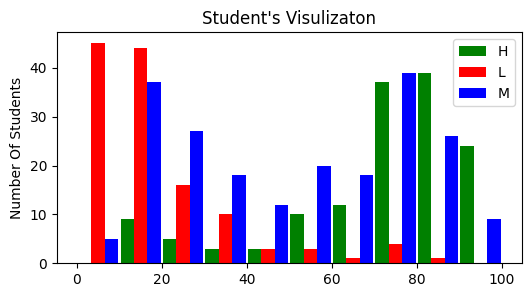

In [ ]:
bar_width = 0.25
fig = plt.subplots(figsize=(6, 3))

class_one = df[df.Class == 0].raisedhands
class_two = df[df.Class == 1].raisedhands
class_three = df[df.Class == 2].raisedhands

plt.title("Student's Visulizaton")
plt.ylabel("Number Of Students")
plt.hist([class_one,class_two,class_three], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

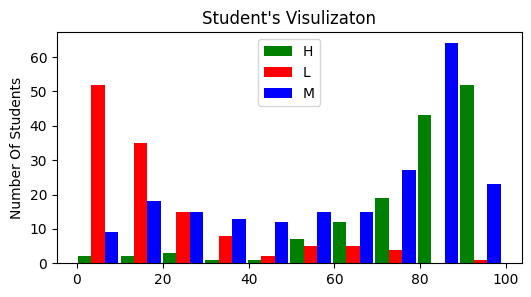

In [ ]:
bar_width = 0.25
fig = plt.subplots(figsize=(6, 3))

class_one = df[df.Class == 0].VisITedResources
class_two = df[df.Class == 1].VisITedResources
class_three = df[df.Class == 2].VisITedResources

plt.title("Student's Visulizaton")
plt.ylabel("Number Of Students")
plt.hist([class_one,class_two,class_three], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

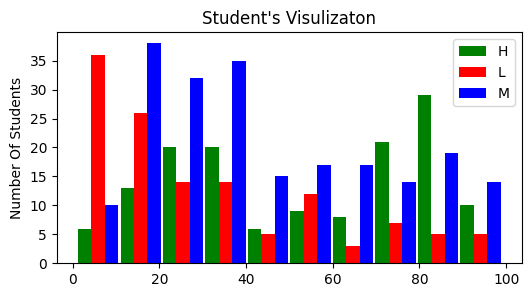

In [ ]:
bar_width = 0.25
fig = plt.subplots(figsize=(6, 3))

class_one = df[df.Class == 0].Discussion
class_two = df[df.Class == 1].Discussion
class_three = df[df.Class == 2].Discussion

plt.title("Student's Visulizaton")
plt.ylabel("Number Of Students")
plt.hist([class_one,class_two,class_three], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

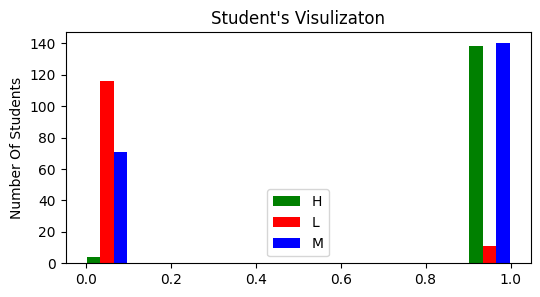

In [ ]:
bar_width = 0.25
fig = plt.subplots(figsize=(6, 3))

class_one = df[df.Class == 0].StudentAbsenceDays
class_two = df[df.Class == 1].StudentAbsenceDays
class_three = df[df.Class == 2].StudentAbsenceDays

plt.title("Student's Visulizaton")
plt.ylabel("Number Of Students")
plt.hist([class_one,class_two,class_three], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

#***Adam-Relu-Implementation***

##***Adam-Relu-3HiddenLayers***

###Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 49ms/step - loss: 1.1800 - sparse_categorical_accuracy: 0.4062 - val_loss: 1.0163 - val_sparse_categorical_accuracy: 0.4375
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8806 - sparse_categorical_accuracy: 0.5234 - val_loss: 0.9558 - val_sparse_categorical_accuracy: 0.4688
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 0.8377 - sparse_categorical_accuracy: 0.5651 - val_loss: 0.9521 - val_sparse_categorical_accuracy: 0.4792
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 0.8008 - sparse_categorical_accuracy: 0.5938 - val_loss: 1.0007 - val_sparse_categorical_accuracy: 0.4583
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7688 - sparse_categorical_accuracy: 0.6120 - val_loss: 0.9077 - val_sparse_categorical_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7571 - sparse_categorical

###Loss and Accuracy Diagram

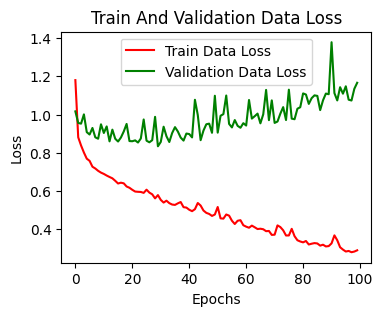

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

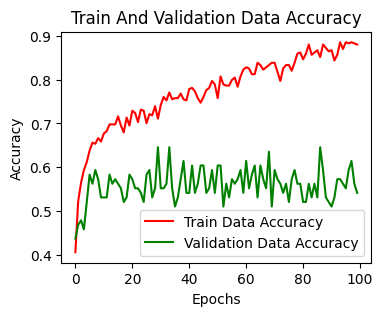

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.95      0.73      0.82       103
     Class 1       0.96      0.96      0.96       106
     Class 2       0.84      0.96      0.90       175

    accuracy                           0.90       384
   macro avg       0.92      0.88      0.89       384
weighted avg       0.91      0.90      0.90       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.63      0.31      0.41        39
     Class 1       0.73      0.76      0.74        21
     Class 2       0.44      0.67      0.53        36

    accuracy                           0.54        96
   macro avg       0.60      0.58      0.56        96
weighted avg       0.58      0.54      0.53        96



### Confusion Matrix

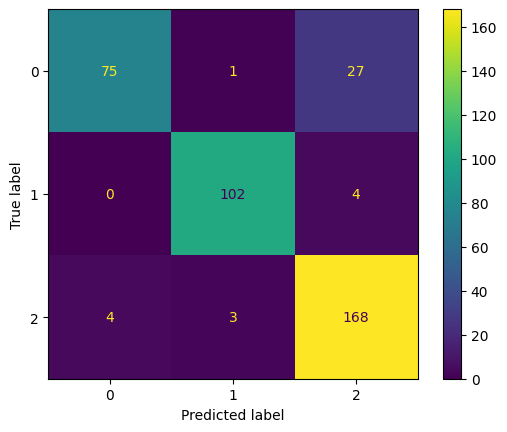

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

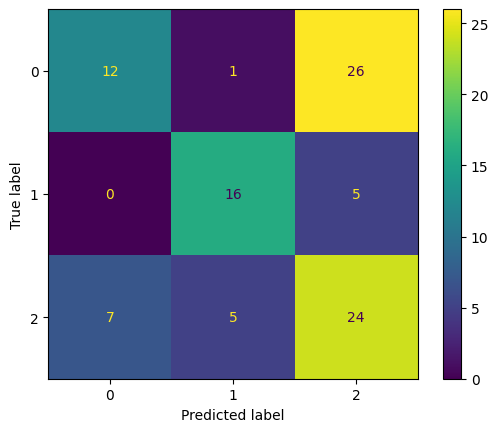

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

##***Adam-Relu-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 46ms/step - loss: 1.8557 - sparse_categorical_accuracy: 0.3620 - val_loss: 1.4293 - val_sparse_categorical_accuracy: 0.4062
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 1.0703 - sparse_categorical_accuracy: 0.4740 - val_loss: 1.0041 - val_sparse_categorical_accuracy: 0.4583
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 0.8890 - sparse_categorical_accuracy: 0.5391 - val_loss: 0.9829 - val_sparse_categorical_accuracy: 0.4479
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8402 - sparse_categorical_accuracy: 0.5729 - val_loss: 0.8796 - val_sparse_categorical_accuracy: 0.5833
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7956 - sparse_categorical_accuracy: 0.5964 - val_loss: 0.8862 - val_sparse_categorical_accuracy: 0.5625
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7758 - sparse_categorica

###Loss and Accuracy Diagram

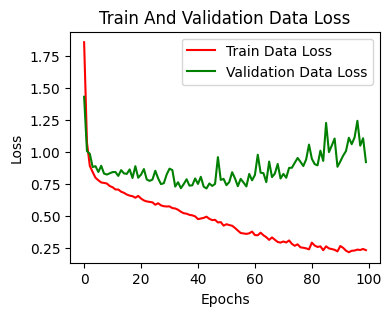

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

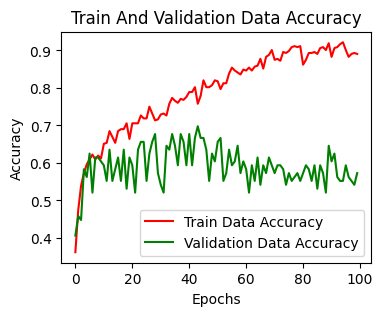

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.95      0.78      0.86       103
     Class 1       0.99      0.98      0.99       106
     Class 2       0.88      0.98      0.92       175

    accuracy                           0.92       384
   macro avg       0.94      0.91      0.92       384
weighted avg       0.93      0.92      0.92       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.64      0.41      0.50        39
     Class 1       0.80      0.76      0.78        21
     Class 2       0.45      0.64      0.53        36

    accuracy                           0.57        96
   macro avg       0.63      0.60      0.60        96
weighted avg       0.60      0.57      0.57        96



### Confussion Matrix

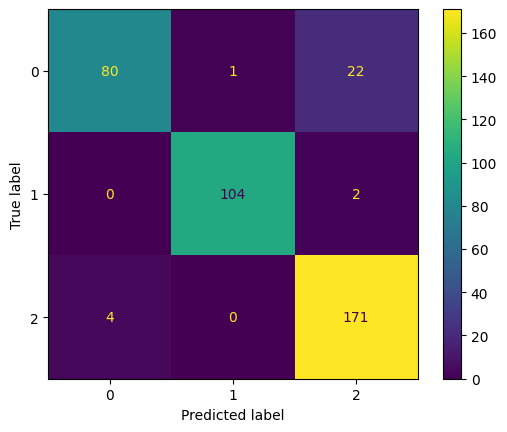

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

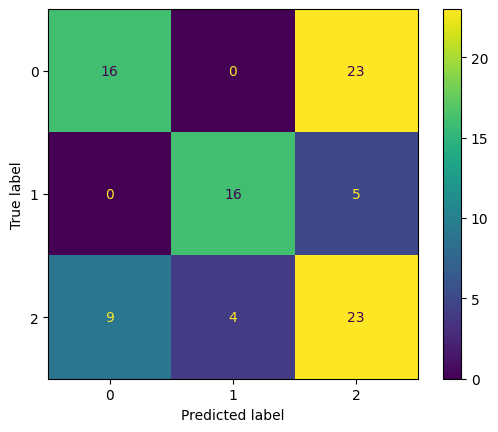

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Relu-5HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 50ms/step - loss: 2.0497 - sparse_categorical_accuracy: 0.5286 - val_loss: 1.6017 - val_sparse_categorical_accuracy: 0.4375
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 1.1544 - sparse_categorical_accuracy: 0.3984 - val_loss: 1.2089 - val_sparse_categorical_accuracy: 0.2188
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 1.0999 - sparse_categorical_accuracy: 0.2734 - val_loss: 1.1037 - val_sparse_categorical_accuracy: 0.2188
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0569 - sparse_categorical_accuracy: 0.3385 - val_loss: 1.0692 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0433 - sparse_categorical_accuracy: 0.5391 - val_loss: 1.0626 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0345 - sparse_categorica

### Loss and Accuracy Diagram

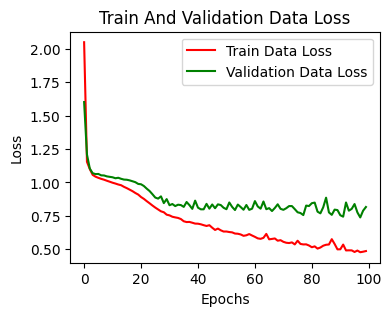

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

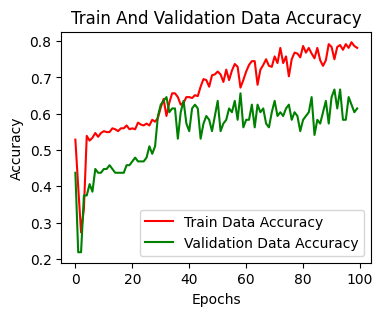

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.77      0.71      0.74       103
     Class 1       0.90      0.96      0.93       106
     Class 2       0.81      0.82      0.81       175

    accuracy                           0.83       384
   macro avg       0.83      0.83      0.83       384
weighted avg       0.83      0.83      0.83       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.80      0.41      0.54        39
     Class 1       0.76      0.76      0.76        21
     Class 2       0.49      0.75      0.59        36

    accuracy                           0.61        96
   macro avg       0.68      0.64      0.63        96
weighted avg       0.68      0.61      0.61        96



### Confusion Matrix

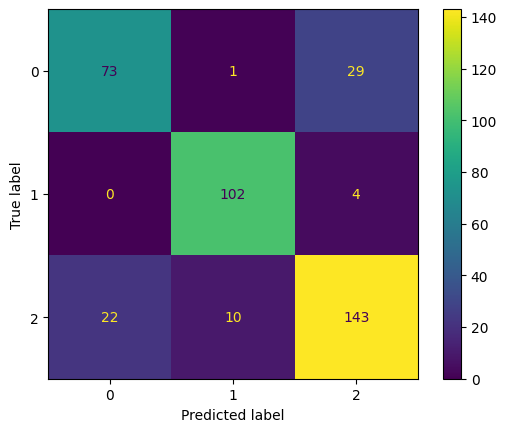

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

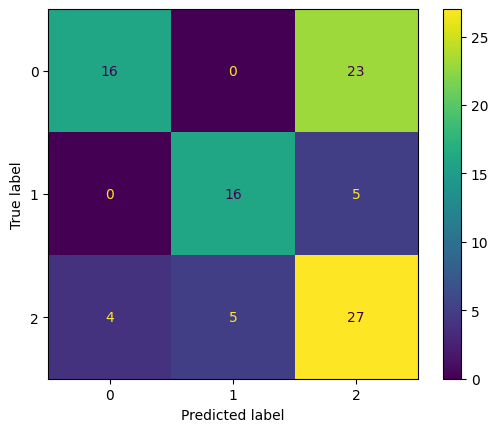

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

##***Adam-Relu-Dropout-3HiddenLayers***

###Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 8.6105 - sparse_categorical_accuracy: 0.2839 - val_loss: 2.2873 - val_sparse_categorical_accuracy: 0.2812
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 4.7652 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.9170 - val_sparse_categorical_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 3.4070 - sparse_categorical_accuracy: 0.4010 - val_loss: 1.7774 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 3.0785 - sparse_categorical_accuracy: 0.3698 - val_loss: 1.3866 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 2.3932 - sparse_categorical_accuracy: 0.3750 - val_loss: 1.2365 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 2.1220 - sparse_categorical_acc

###Loss and Accuracy Diagram

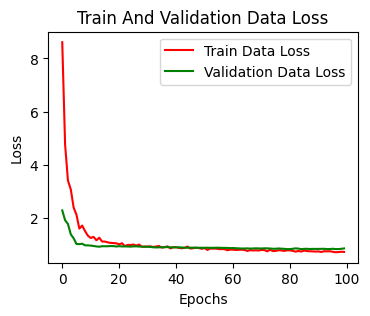

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

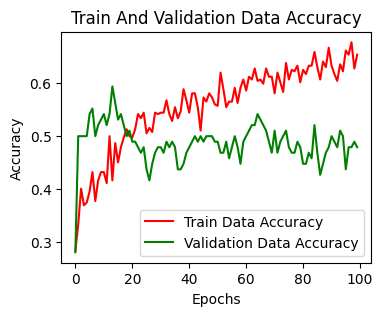

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.77      0.17      0.27       103
     Class 1       0.80      0.79      0.80       106
     Class 2       0.58      0.86      0.69       175

    accuracy                           0.65       384
   macro avg       0.72      0.60      0.59       384
weighted avg       0.69      0.65      0.61       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.67      0.05      0.10        39
     Class 1       0.68      0.71      0.70        21
     Class 2       0.41      0.81      0.54        36

    accuracy                           0.48        96
   macro avg       0.59      0.52      0.44        96
weighted avg       0.57      0.48      0.39        96



###Confusion Matrix

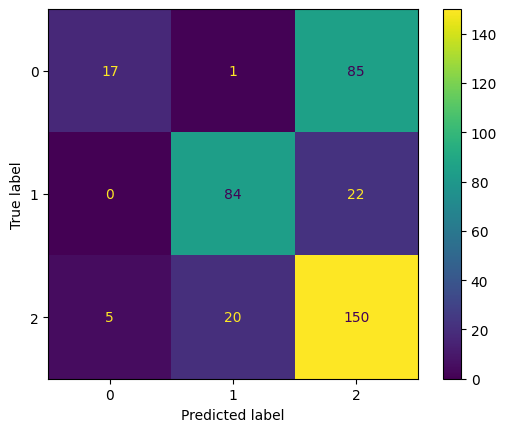

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

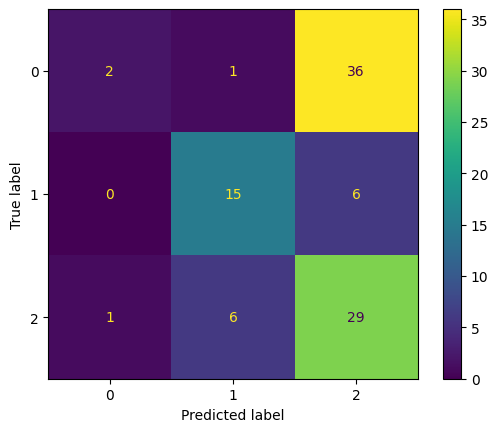

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

##***Adam-Relu-Dropout-4HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 24ms/step - loss: 2.0559 - sparse_categorical_accuracy: 0.3854 - val_loss: 1.0201 - val_sparse_categorical_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0207 - sparse_categorical_accuracy: 0.4974 - val_loss: 0.9051 - val_sparse_categorical_accuracy: 0.5729
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9183 - sparse_categorical_accuracy: 0.5521 - val_loss: 0.9056 - val_sparse_categorical_accuracy: 0.4583
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8981 - sparse_categorical_accuracy: 0.5599 - val_loss: 0.8692 - val_sparse_categorical_accuracy: 0.5104
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8331 - sparse_categorical_accuracy: 0.5651 - val_loss: 0.8772 - val_sparse_categorical_accuracy: 0.4583
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8259 - sparse_categorical_acc

###Loss and Accuracy Diagrams

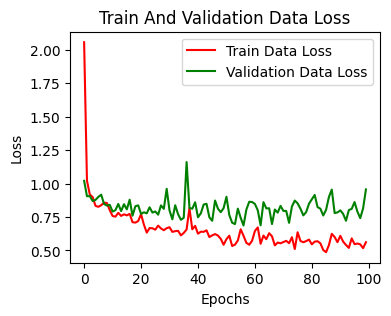

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

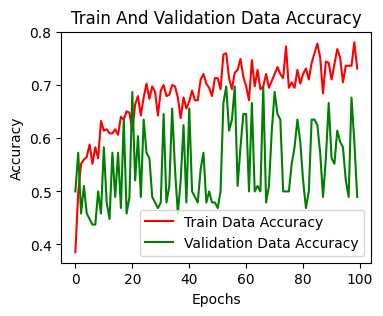

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.88      0.07      0.13       103
     Class 1       0.91      0.93      0.92       106
     Class 2       0.61      0.94      0.74       175

    accuracy                           0.70       384
   macro avg       0.80      0.65      0.60       384
weighted avg       0.77      0.70      0.63       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        39
     Class 1       0.88      0.67      0.76        21
     Class 2       0.42      0.92      0.57        36

    accuracy                           0.49        96
   macro avg       0.43      0.53      0.44        96
weighted avg       0.35      0.49      0.38        96



### confusion matrix

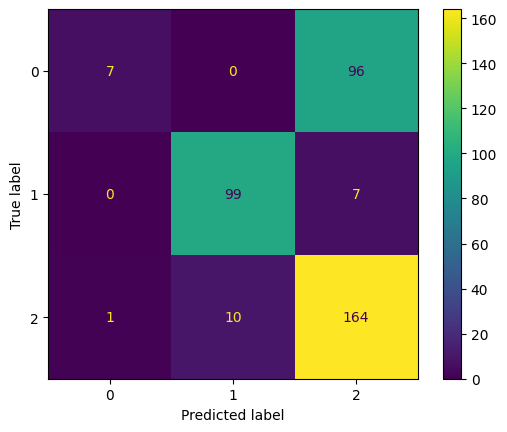

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

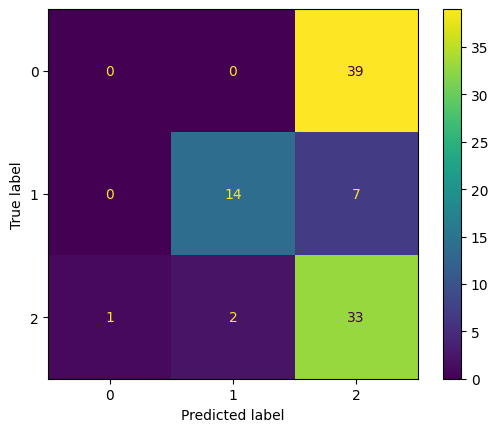

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

##***Adam-Relu-Dropout-5HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 28ms/step - loss: 2.0769 - sparse_categorical_accuracy: 0.3906 - val_loss: 1.1573 - val_sparse_categorical_accuracy: 0.4271
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1403 - sparse_categorical_accuracy: 0.4089 - val_loss: 1.0735 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0360 - sparse_categorical_accuracy: 0.4245 - val_loss: 1.0412 - val_sparse_categorical_accuracy: 0.4167
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0621 - sparse_categorical_accuracy: 0.4271 - val_loss: 1.0237 - val_sparse_categorical_accuracy: 0.4583
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9648 - sparse_categorical_accuracy: 0.5443 - val_loss: 0.9803 - val_sparse_categorical_accuracy: 0.4479
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9474 - sparse_categorical_acc

### Loss and Accuracy Diagrams

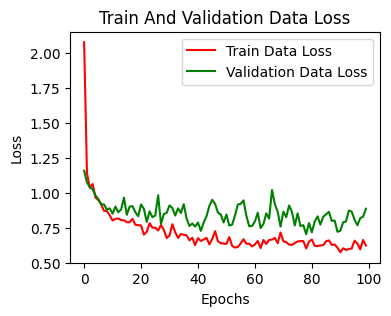

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

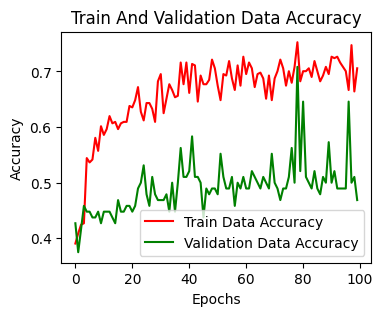

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       103
     Class 1       0.80      0.93      0.86       106
     Class 2       0.58      0.86      0.69       175

    accuracy                           0.65       384
   macro avg       0.46      0.60      0.52       384
weighted avg       0.49      0.65      0.55       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        39
     Class 1       0.70      0.76      0.73        21
     Class 2       0.40      0.81      0.53        36

    accuracy                           0.47        96
   macro avg       0.36      0.52      0.42        96
weighted avg       0.30      0.47      0.36        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Confussion Matrix

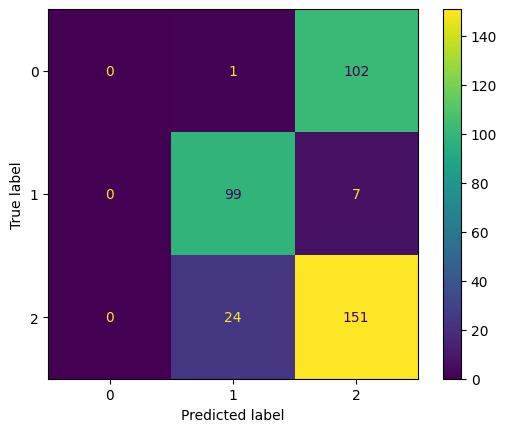

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

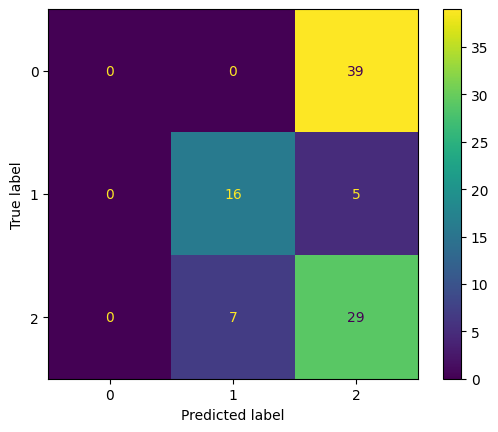

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

##***Mini-Batch-Adam-Relu-Dropout-3HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train,batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 2.9507 - sparse_categorical_accuracy: 0.4219 - val_loss: 1.5226 - val_sparse_categorical_accuracy: 0.4479
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 2.0089 - sparse_categorical_accuracy: 0.4193 - val_loss: 1.1542 - val_sparse_categorical_accuracy: 0.4792
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.6022 - sparse_categorical_accuracy: 0.3984 - val_loss: 1.2045 - val_sparse_categorical_accuracy: 0.4375
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 1.4895 - sparse_categorical_accuracy: 0.4375 - val_loss: 1.1746 - val_sparse_categorical_accuracy: 0.4688
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 1.2053 - sparse_categorical_accuracy: 0.4766 - val_loss: 1.0038 - val_sparse_categorical_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 1.1522 - sparse_categorical_acc

###Loss and Accuracy Diagrams

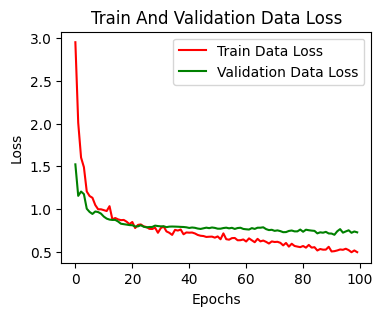

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

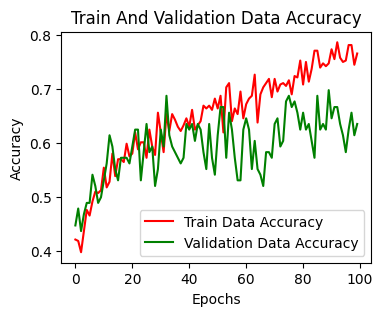

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.75      0.80      0.77       103
     Class 1       0.94      0.96      0.95       106
     Class 2       0.85      0.81      0.83       175

    accuracy                           0.85       384
   macro avg       0.85      0.85      0.85       384
weighted avg       0.85      0.85      0.85       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.68      0.59      0.63        39
     Class 1       0.88      0.71      0.79        21
     Class 2       0.51      0.64      0.57        36

    accuracy                           0.64        96
   macro avg       0.69      0.65      0.66        96
weighted avg       0.66      0.64      0.64        96



### Confusion Matrix

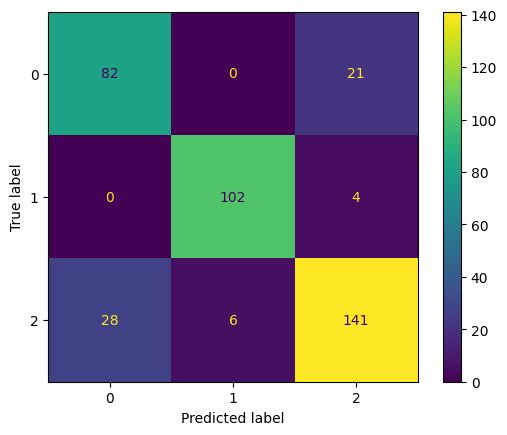

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

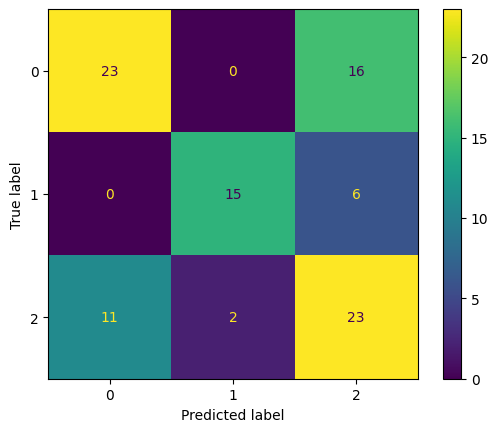

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Mini-Batch-Adam-Relu-Dropout-4HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
6/6 [==============================] - 2s 53ms/step - loss: 3.9772 - sparse_categorical_accuracy: 0.3464 - val_loss: 1.3259 - val_sparse_categorical_accuracy: 0.3646
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 2.6579 - sparse_categorical_accuracy: 0.3464 - val_loss: 1.0771 - val_sparse_categorical_accuracy: 0.4167
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 2.3677 - sparse_categorical_accuracy: 0.3672 - val_loss: 1.0053 - val_sparse_categorical_accuracy: 0.4062
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 1.8341 - sparse_categorical_accuracy: 0.4167 - val_loss: 0.9822 - val_sparse_categorical_accuracy: 0.4167
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 1.7652 - sparse_categorical_accuracy: 0.3672 - val_loss: 0.9944 - val_sparse_categorical_accuracy: 0.4167
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 1.6398 - sparse_categorical_accuracy: 

### Loss and Accuracy Diagrams

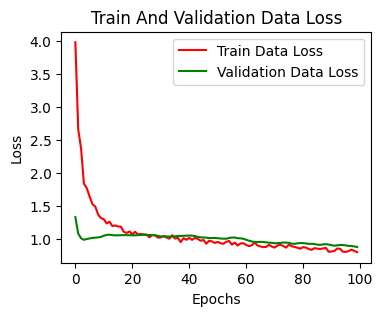

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

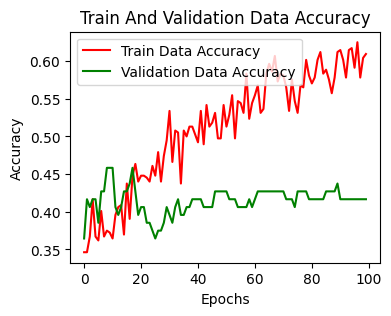

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       103
     Class 1       0.65      0.95      0.77       106
     Class 2       0.55      0.72      0.63       175

    accuracy                           0.59       384
   macro avg       0.40      0.56      0.47       384
weighted avg       0.43      0.59      0.50       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        39
     Class 1       0.53      0.81      0.64        21
     Class 2       0.36      0.64      0.46        36

    accuracy                           0.42        96
   macro avg       0.30      0.48      0.37        96
weighted avg       0.25      0.42      0.31        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

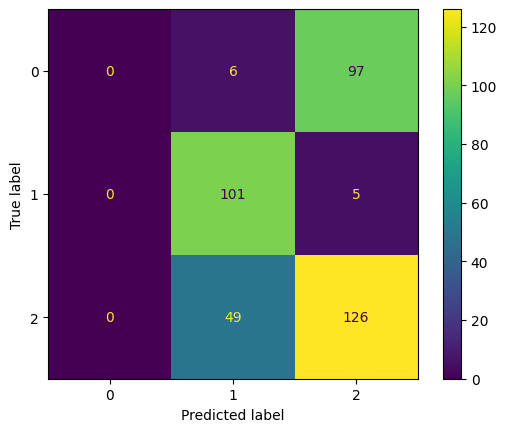

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

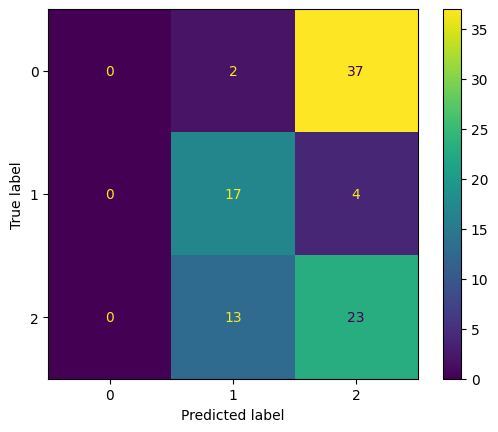

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Mini-Batch-Adam-Relu-Dropout-5HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, input_shape=(16,), activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 27ms/step - loss: 1.6358 - sparse_categorical_accuracy: 0.4036 - val_loss: 1.0510 - val_sparse_categorical_accuracy: 0.5417
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0992 - sparse_categorical_accuracy: 0.3932 - val_loss: 1.0469 - val_sparse_categorical_accuracy: 0.4479
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0401 - sparse_categorical_accuracy: 0.4505 - val_loss: 1.0071 - val_sparse_categorical_accuracy: 0.4271
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9816 - sparse_categorical_accuracy: 0.4896 - val_loss: 0.9545 - val_sparse_categorical_accuracy: 0.4375
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9599 - sparse_categorical_accuracy: 0.5130 - val_loss: 0.9036 - val_sparse_categorical_accuracy: 0.6354
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9594 - sparse_categorical_acc

### Loss and Accuracy Diagrams

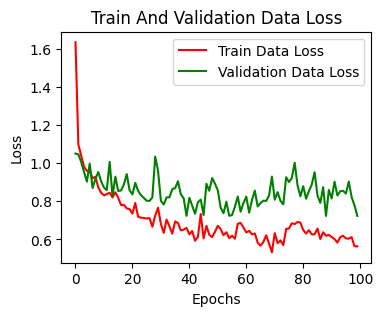

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

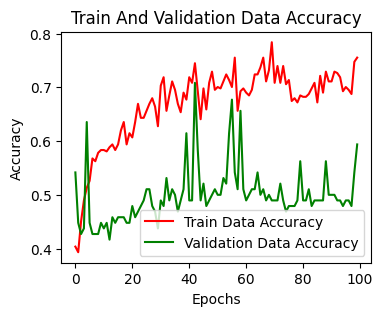

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.78      0.54      0.64       103
     Class 1       0.91      0.96      0.94       106
     Class 2       0.74      0.85      0.79       175

    accuracy                           0.80       384
   macro avg       0.81      0.79      0.79       384
weighted avg       0.80      0.80      0.79       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.36      0.50        39
     Class 1       0.78      0.67      0.72        21
     Class 2       0.48      0.81      0.60        36

    accuracy                           0.59        96
   macro avg       0.69      0.61      0.61        96
weighted avg       0.68      0.59      0.58        96



### Confusion Matrix

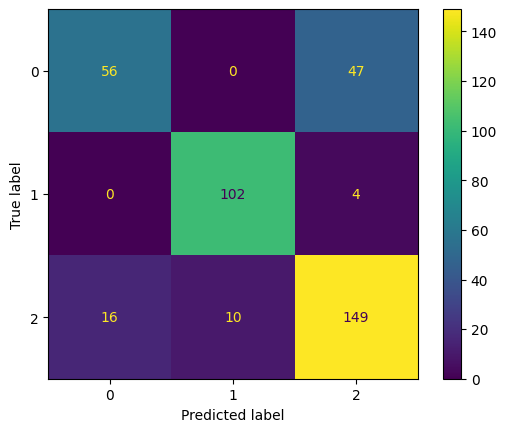

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

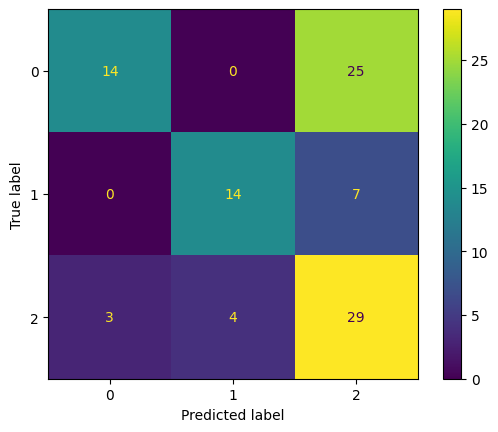

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Relu-3HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 51ms/step - loss: 0.9953 - sparse_categorical_accuracy: 0.5234 - val_loss: 1.2445 - val_sparse_categorical_accuracy: 0.4271
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.7940 - sparse_categorical_accuracy: 0.6276 - val_loss: 1.7542 - val_sparse_categorical_accuracy: 0.4479
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6838 - sparse_categorical_accuracy: 0.6901 - val_loss: 1.6240 - val_sparse_categorical_accuracy: 0.4688
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6756 - sparse_categorical_accuracy: 0.6719 - val_loss: 1.6179 - val_sparse_categorical_accuracy: 0.5104
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6534 - sparse_categorical_accuracy: 0.6849 - val_loss: 1.2870 - val_sparse_categorical_accuracy: 0.5833
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6748 - sparse_categorica

### Loss and Accuracy Diagrams

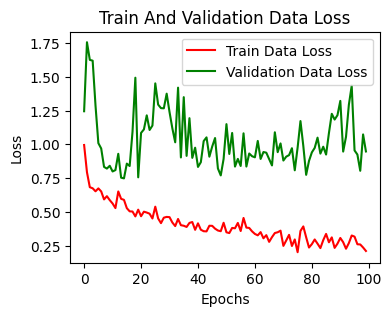

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

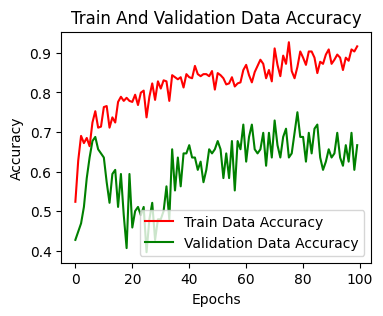

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.81      0.98      0.89       103
     Class 1       0.95      0.99      0.97       106
     Class 2       0.98      0.84      0.90       175

    accuracy                           0.92       384
   macro avg       0.92      0.94      0.92       384
weighted avg       0.93      0.92      0.92       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.70      0.72      0.71        39
     Class 1       0.88      0.67      0.76        21
     Class 2       0.55      0.61      0.58        36

    accuracy                           0.67        96
   macro avg       0.71      0.67      0.68        96
weighted avg       0.68      0.67      0.67        96



### Confusion Matrix

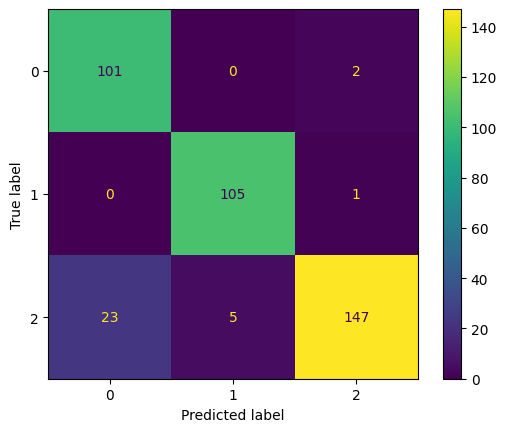

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

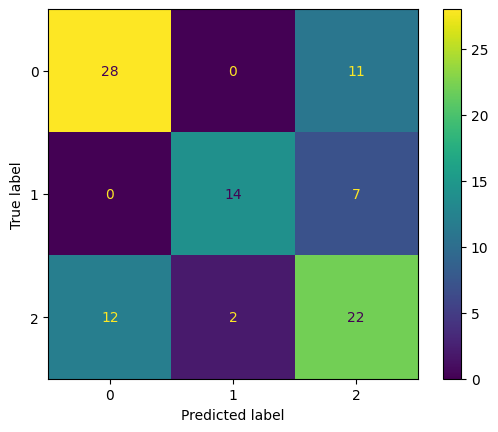

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Relu-4HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 4s 32ms/step - loss: 1.2901 - sparse_categorical_accuracy: 0.4219 - val_loss: 1.6407 - val_sparse_categorical_accuracy: 0.3646
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9830 - sparse_categorical_accuracy: 0.5443 - val_loss: 1.1325 - val_sparse_categorical_accuracy: 0.3542
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8605 - sparse_categorical_accuracy: 0.6224 - val_loss: 1.0227 - val_sparse_categorical_accuracy: 0.3958
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7703 - sparse_categorical_accuracy: 0.6693 - val_loss: 1.0232 - val_sparse_categorical_accuracy: 0.4167
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7302 - sparse_categorical_accuracy: 0.6719 - val_loss: 0.9627 - val_sparse_categorical_accuracy: 0.4062
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7055 - sparse_categorical_acc

### Loss and Accuracy Diagrams

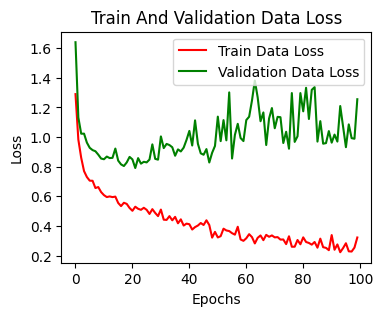

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

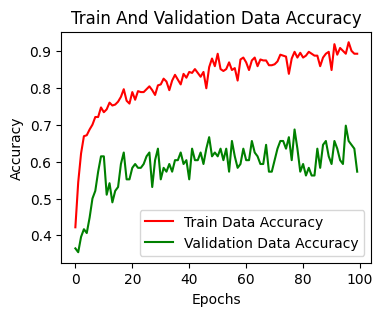

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       103
     Class 1       0.98      1.00      0.99       106
     Class 2       0.95      0.95      0.95       175

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.61      0.28      0.39        39
     Class 1       0.89      0.81      0.85        21
     Class 2       0.46      0.75      0.57        36

    accuracy                           0.57        96
   macro avg       0.65      0.61      0.60        96
weighted avg       0.62      0.57      0.56        96



### Confusion Matrix

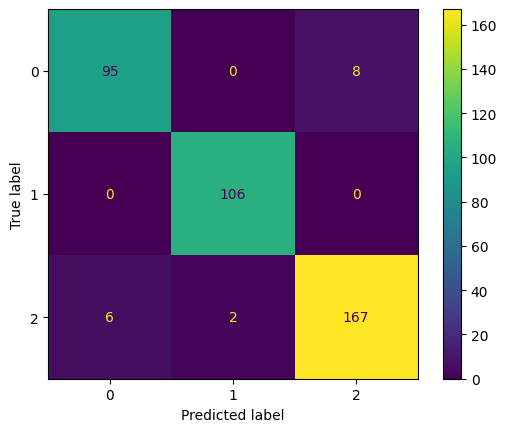

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

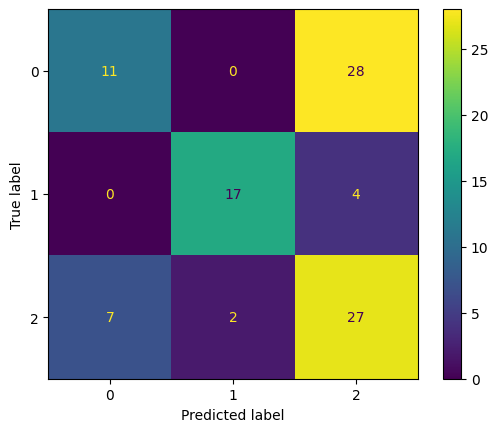

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Relu-5HiddenLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.0075),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 5s 41ms/step - loss: 1.1279 - sparse_categorical_accuracy: 0.4401 - val_loss: 1.2310 - val_sparse_categorical_accuracy: 0.4479
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7789 - sparse_categorical_accuracy: 0.6745 - val_loss: 1.1201 - val_sparse_categorical_accuracy: 0.4583
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6709 - sparse_categorical_accuracy: 0.7161 - val_loss: 1.1478 - val_sparse_categorical_accuracy: 0.4583
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6741 - sparse_categorical_accuracy: 0.6823 - val_loss: 1.0666 - val_sparse_categorical_accuracy: 0.4792
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6245 - sparse_categorical_accuracy: 0.7214 - val_loss: 1.0658 - val_sparse_categorical_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5785 - sparse_categorical_a

### Loss and Accuracy Diagrams

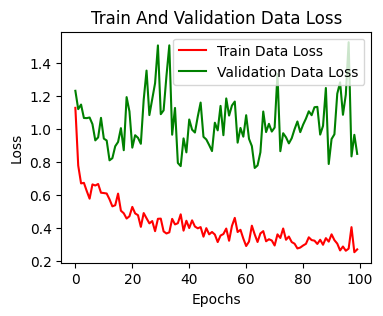

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

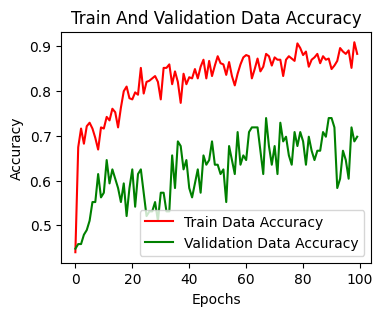

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.76      0.95      0.84       103
     Class 1       0.91      0.99      0.95       106
     Class 2       0.96      0.77      0.86       175

    accuracy                           0.88       384
   macro avg       0.88      0.90      0.88       384
weighted avg       0.90      0.88      0.88       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.73      0.82      0.77        39
     Class 1       0.71      0.81      0.76        21
     Class 2       0.64      0.50      0.56        36

    accuracy                           0.70        96
   macro avg       0.69      0.71      0.70        96
weighted avg       0.69      0.70      0.69        96



### Confusion Matrix

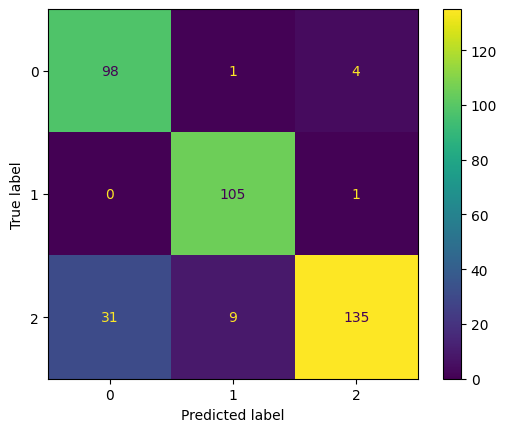

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

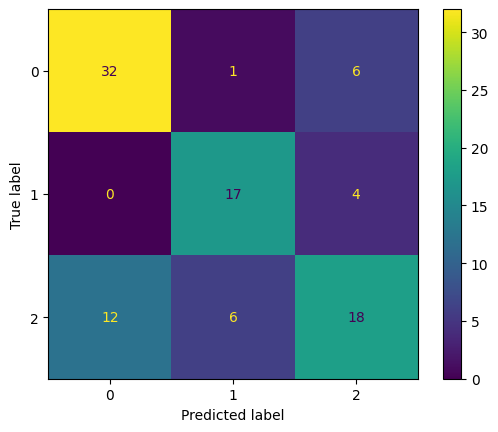

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Relu-L2-Regularization***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(20, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(20, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(20, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(20, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(20, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 33ms/step - loss: 2.5345 - sparse_categorical_accuracy: 0.4062 - val_loss: 1.6896 - val_sparse_categorical_accuracy: 0.5938
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.5438 - sparse_categorical_accuracy: 0.5495 - val_loss: 1.4635 - val_sparse_categorical_accuracy: 0.5625
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.3731 - sparse_categorical_accuracy: 0.5938 - val_loss: 1.3290 - val_sparse_categorical_accuracy: 0.6042
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1.2630 - sparse_categorical_accuracy: 0.6354 - val_loss: 1.3129 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 1.2274 - sparse_categorical_accuracy: 0.5964 - val_loss: 1.4061 - val_sparse_categorical_accuracy: 0.4688
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 1.1986 - sparse_categorical_ac

### Loss and Accuracy Diagrams

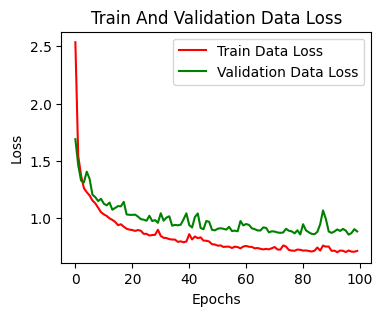

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

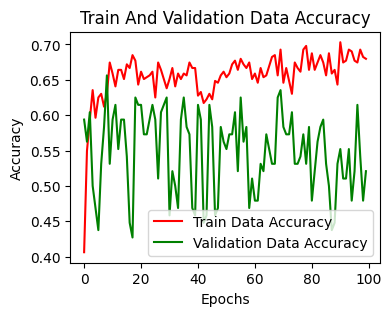

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.71      0.43      0.53       103
     Class 1       0.77      0.85      0.81       106
     Class 2       0.64      0.75      0.69       175

    accuracy                           0.69       384
   macro avg       0.71      0.68      0.68       384
weighted avg       0.70      0.69      0.68       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.68      0.33      0.45        39
     Class 1       0.62      0.71      0.67        21
     Class 2       0.42      0.61      0.49        36

    accuracy                           0.52        96
   macro avg       0.57      0.55      0.54        96
weighted avg       0.57      0.52      0.51        96



### confusion Matrix

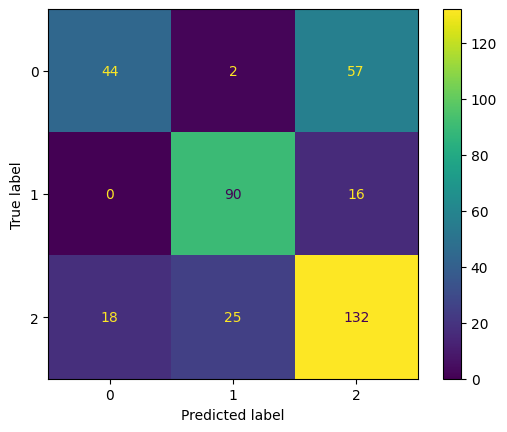

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

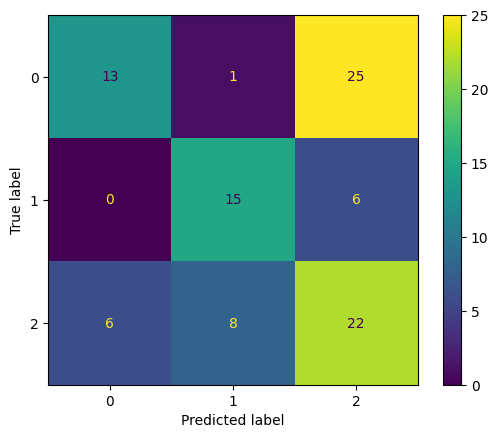

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

# ***Adam-Tanh-Implementation***

##***Adam-Tanh-3HiddentLayers***

###Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="tanh"),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dense(50, activation="tanh"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 33ms/step - loss: 1.0188 - sparse_categorical_accuracy: 0.4714 - val_loss: 1.0343 - val_sparse_categorical_accuracy: 0.3958
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.9296 - sparse_categorical_accuracy: 0.5286 - val_loss: 0.9750 - val_sparse_categorical_accuracy: 0.4479
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8865 - sparse_categorical_accuracy: 0.5807 - val_loss: 0.9503 - val_sparse_categorical_accuracy: 0.4792
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8671 - sparse_categorical_accuracy: 0.5859 - val_loss: 0.9518 - val_sparse_categorical_accuracy: 0.4583
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8457 - sparse_categorical_accuracy: 0.6068 - val_loss: 0.9508 - val_sparse_categorical_accuracy: 0.4792
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8325 - sparse_categorica

###Loss and Accuracy Diagram

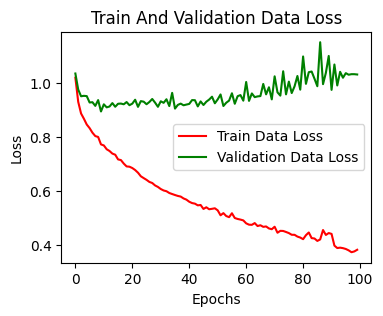

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

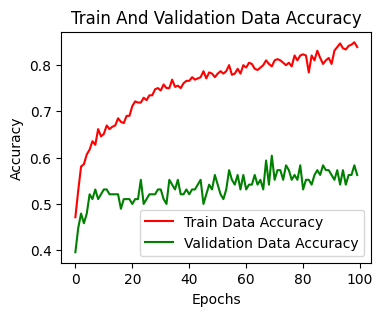

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.80      0.81      0.80       103
     Class 1       0.93      0.92      0.92       106
     Class 2       0.86      0.86      0.86       175

    accuracy                           0.86       384
   macro avg       0.86      0.86      0.86       384
weighted avg       0.86      0.86      0.86       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.60      0.46      0.52        39
     Class 1       0.73      0.76      0.74        21
     Class 2       0.45      0.56      0.50        36

    accuracy                           0.56        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.57      0.56      0.56        96



### Confusion Matrix

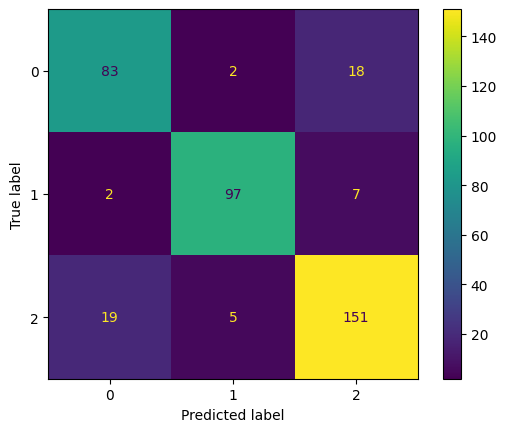

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

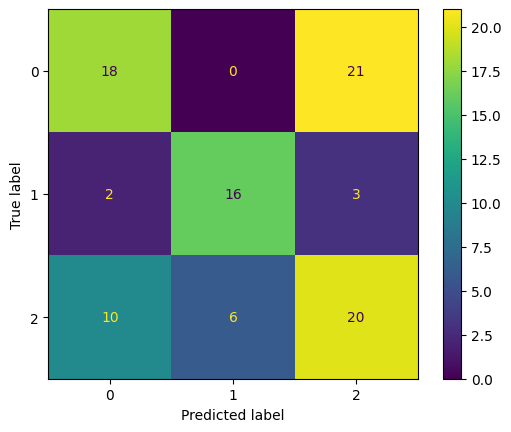

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Tanh-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(16,), activation="tanh"),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dense(50, activation="tanh"),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 6s 48ms/step - loss: 1.0781 - sparse_categorical_accuracy: 0.4297 - val_loss: 1.0098 - val_sparse_categorical_accuracy: 0.3958
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9671 - sparse_categorical_accuracy: 0.5260 - val_loss: 0.9933 - val_sparse_categorical_accuracy: 0.3854
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.9157 - sparse_categorical_accuracy: 0.5521 - val_loss: 0.9332 - val_sparse_categorical_accuracy: 0.4375
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8695 - sparse_categorical_accuracy: 0.5964 - val_loss: 0.9338 - val_sparse_categorical_accuracy: 0.4583
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8244 - sparse_categorical_accuracy: 0.6042 - val_loss: 0.8969 - val_sparse_categorical_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.7861 - sparse_categorical

###Loss and Accuracy Diagram

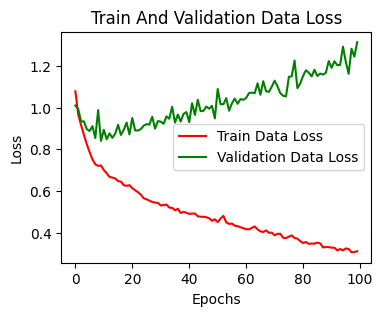

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

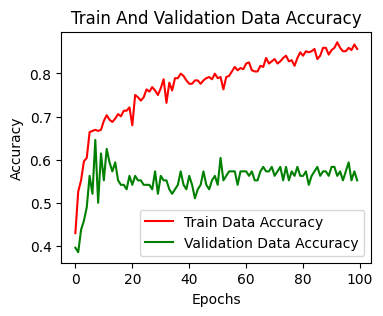

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.93      0.61      0.74       103
     Class 1       1.00      0.93      0.97       106
     Class 2       0.79      0.98      0.87       175

    accuracy                           0.87       384
   macro avg       0.90      0.84      0.86       384
weighted avg       0.88      0.87      0.86       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

     Class 0       0.75      0.31      0.44        39
     Class 1       0.76      0.62      0.68        21
     Class 2       0.44      0.78      0.57        36

    accuracy                           0.55        96
   macro avg       0.65      0.57      0.56        96
weighted avg       0.64      0.55      0.54        96



### Confussion Matrix

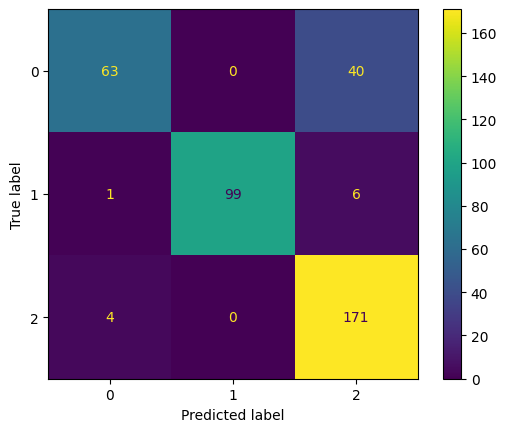

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

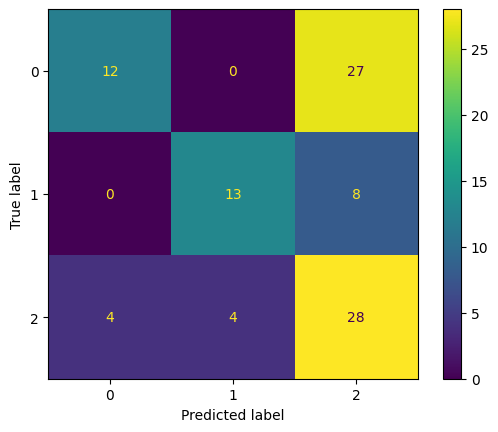

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Tanh-5HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="tanh"),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 38ms/step - loss: 1.0354 - sparse_categorical_accuracy: 0.4479 - val_loss: 1.0382 - val_sparse_categorical_accuracy: 0.3854
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.9796 - sparse_categorical_accuracy: 0.4766 - val_loss: 1.0027 - val_sparse_categorical_accuracy: 0.4688
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.9370 - sparse_categorical_accuracy: 0.5495 - val_loss: 0.9801 - val_sparse_categorical_accuracy: 0.4375
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.9049 - sparse_categorical_accuracy: 0.5495 - val_loss: 0.9514 - val_sparse_categorical_accuracy: 0.4271
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8857 - sparse_categorical_accuracy: 0.5599 - val_loss: 0.9488 - val_sparse_categorical_accuracy: 0.4271
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8691 - sparse_categorica

### Loss and Accuracy Diagram

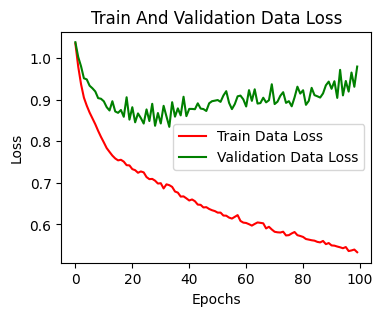

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

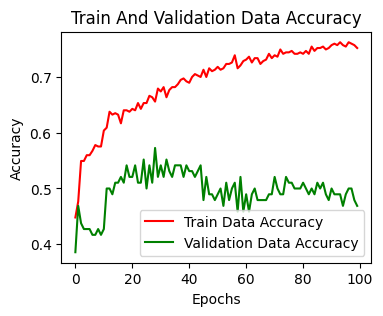

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.63      0.69      0.66       103
     Class 1       0.93      0.89      0.91       106
     Class 2       0.76      0.74      0.75       175

    accuracy                           0.77       384
   macro avg       0.77      0.77      0.77       384
weighted avg       0.77      0.77      0.77       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.50      0.33      0.40        39
     Class 1       0.64      0.76      0.70        21
     Class 2       0.36      0.44      0.40        36

    accuracy                           0.47        96
   macro avg       0.50      0.51      0.50        96
weighted avg       0.48      0.47      0.46        96



### Confusion Matrix

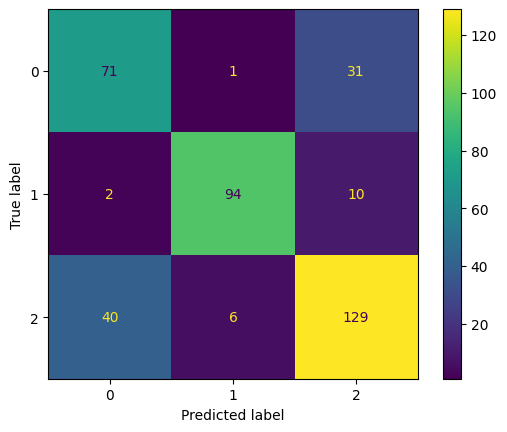

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

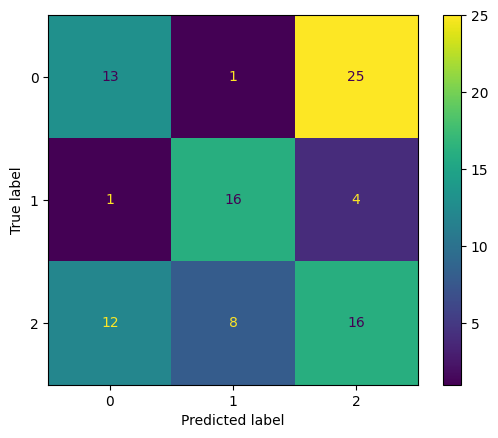

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Tanh-Dropout-3HiddentLayers***

###Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 38ms/step - loss: 1.0745 - sparse_categorical_accuracy: 0.4323 - val_loss: 0.9764 - val_sparse_categorical_accuracy: 0.4688
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9823 - sparse_categorical_accuracy: 0.5026 - val_loss: 0.9202 - val_sparse_categorical_accuracy: 0.4583
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9500 - sparse_categorical_accuracy: 0.5182 - val_loss: 0.9072 - val_sparse_categorical_accuracy: 0.4792
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.9647 - sparse_categorical_accuracy: 0.4974 - val_loss: 0.9118 - val_sparse_categorical_accuracy: 0.4896
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9342 - sparse_categorical_accuracy: 0.5391 - val_loss: 0.9012 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9208 - sparse_categorica

###Loss and Accuracy Diagram

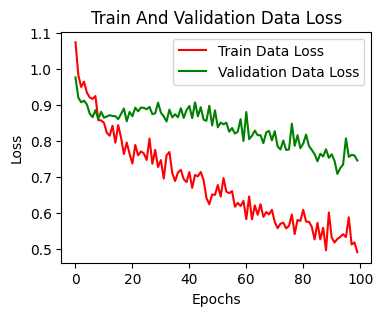

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

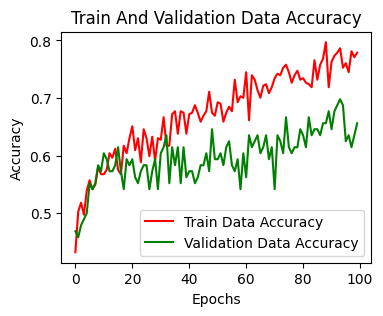

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.73      0.77       103
     Class 1       0.94      0.94      0.94       106
     Class 2       0.82      0.87      0.84       175

    accuracy                           0.85       384
   macro avg       0.86      0.85      0.85       384
weighted avg       0.85      0.85      0.85       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.83      0.51      0.63        39
     Class 1       0.82      0.67      0.74        21
     Class 2       0.53      0.81      0.64        36

    accuracy                           0.66        96
   macro avg       0.73      0.66      0.67        96
weighted avg       0.72      0.66      0.66        96



###Confusion Matrix

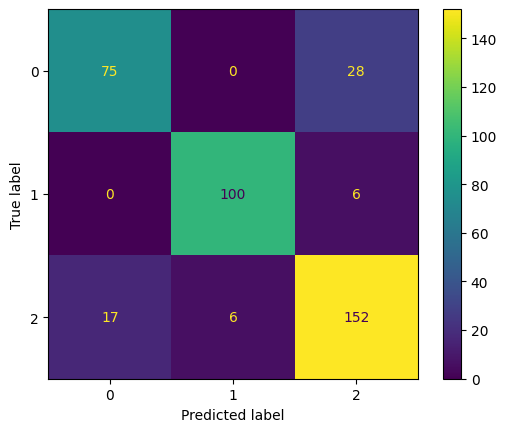

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

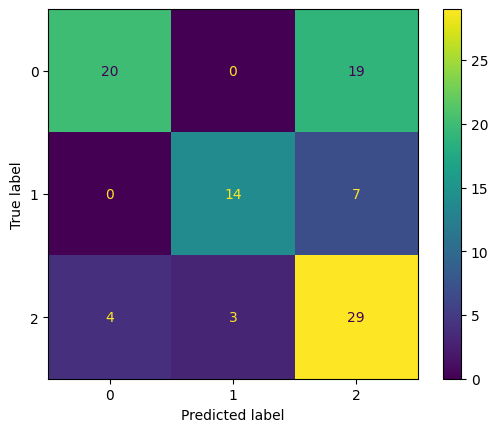

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Tanh-Dropout-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 36ms/step - loss: 1.0929 - sparse_categorical_accuracy: 0.4453 - val_loss: 0.9622 - val_sparse_categorical_accuracy: 0.4479
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.9345 - sparse_categorical_accuracy: 0.5521 - val_loss: 0.9236 - val_sparse_categorical_accuracy: 0.4792
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.9358 - sparse_categorical_accuracy: 0.5026 - val_loss: 0.8371 - val_sparse_categorical_accuracy: 0.5521
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8787 - sparse_categorical_accuracy: 0.5547 - val_loss: 0.8614 - val_sparse_categorical_accuracy: 0.4479
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8793 - sparse_categorical_accuracy: 0.5417 - val_loss: 0.8512 - val_sparse_categorical_accuracy: 0.5938
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8090 - sparse_categorical_

###Loss and Accuracy Diagrams

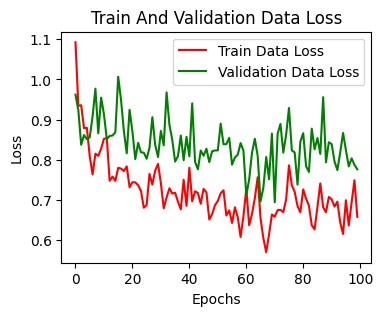

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

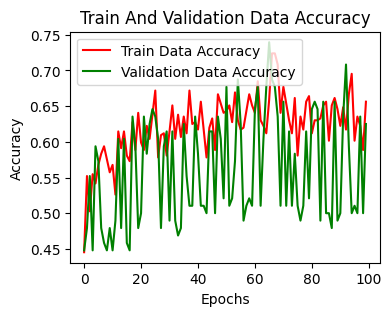

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.50      0.95      0.66       103
     Class 1       0.90      0.89      0.89       106
     Class 2       0.80      0.38      0.51       175

    accuracy                           0.67       384
   macro avg       0.73      0.74      0.69       384
weighted avg       0.74      0.67      0.65       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

     Class 0       0.60      0.85      0.70        39
     Class 1       0.80      0.76      0.78        21
     Class 2       0.52      0.31      0.39        36

    accuracy                           0.62        96
   macro avg       0.64      0.64      0.62        96
weighted avg       0.62      0.62      0.60        96



### confusion matrix

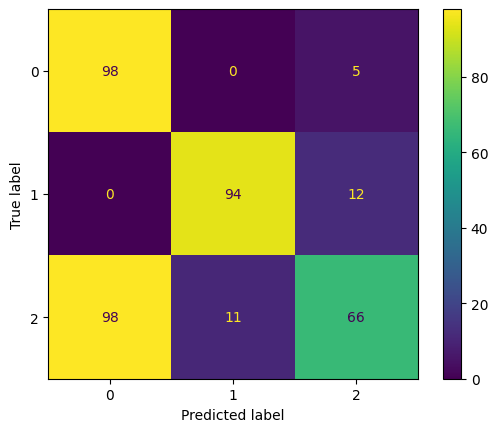

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

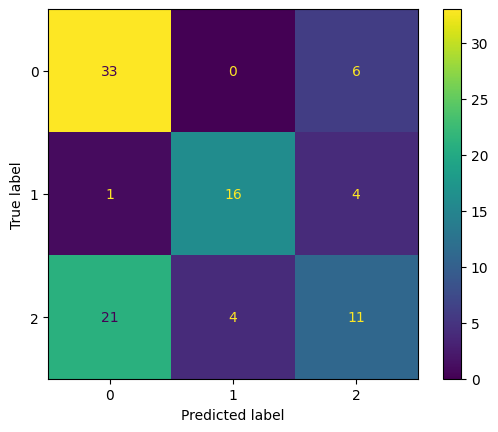

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Tanh-Dropout-5HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, input_shape=(16,), activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 50ms/step - loss: 1.0421 - sparse_categorical_accuracy: 0.4661 - val_loss: 1.0154 - val_sparse_categorical_accuracy: 0.4792
Epoch 2/100
12/12 [==============================] - 0s 37ms/step - loss: 0.9177 - sparse_categorical_accuracy: 0.5677 - val_loss: 0.9061 - val_sparse_categorical_accuracy: 0.5729
Epoch 3/100
12/12 [==============================] - 0s 33ms/step - loss: 0.8926 - sparse_categorical_accuracy: 0.5260 - val_loss: 0.9703 - val_sparse_categorical_accuracy: 0.4271
Epoch 4/100
12/12 [==============================] - 0s 26ms/step - loss: 0.8451 - sparse_categorical_accuracy: 0.5807 - val_loss: 0.8642 - val_sparse_categorical_accuracy: 0.5729
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.9020 - sparse_categorical_accuracy: 0.5573 - val_loss: 0.8866 - val_sparse_categorical_accuracy: 0.5729
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.8534 - sparse_categorica

### Loss and Accuracy Diagrams

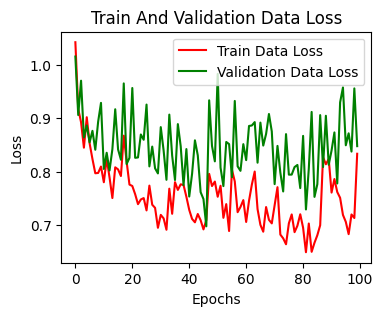

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

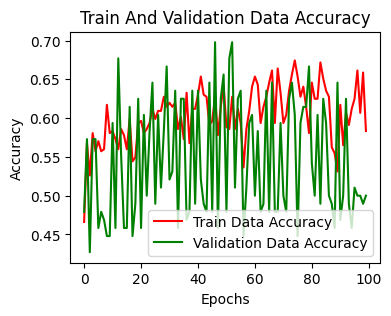

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.31      0.04      0.07       103
     Class 1       0.94      0.64      0.76       106
     Class 2       0.55      0.93      0.69       175

    accuracy                           0.61       384
   macro avg       0.60      0.54      0.51       384
weighted avg       0.59      0.61      0.54       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.50      0.03      0.05        39
     Class 1       1.00      0.57      0.73        21
     Class 2       0.43      0.97      0.59        36

    accuracy                           0.50        96
   macro avg       0.64      0.52      0.46        96
weighted avg       0.58      0.50      0.40        96



###Confussion Matrix

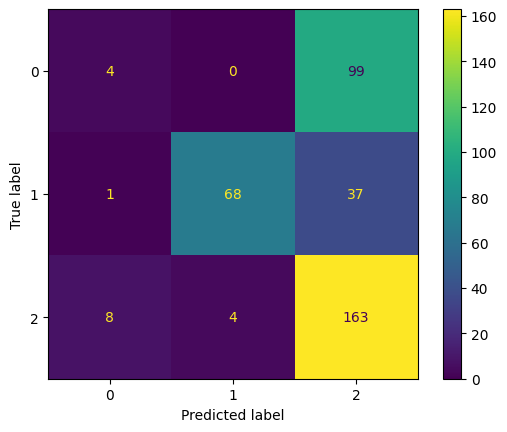

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

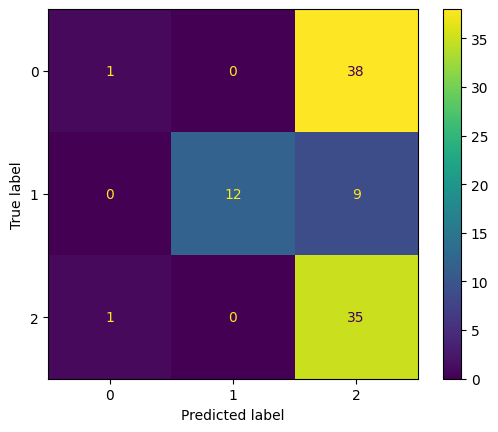

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Tanh-3HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 5s 50ms/step - loss: 1.5125 - sparse_categorical_accuracy: 0.3620 - val_loss: 1.0298 - val_sparse_categorical_accuracy: 0.4062
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0966 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.0049 - val_sparse_categorical_accuracy: 0.4062
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9705 - sparse_categorical_accuracy: 0.5104 - val_loss: 0.9953 - val_sparse_categorical_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9108 - sparse_categorical_accuracy: 0.5651 - val_loss: 0.9820 - val_sparse_categorical_accuracy: 0.4688
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.8913 - sparse_categorical_accuracy: 0.5495 - val_loss: 0.9701 - val_sparse_categorical_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.9016 - sparse_categorical_a

### Loss and Accuracy Diagrams

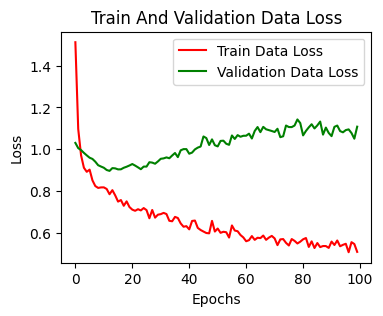

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

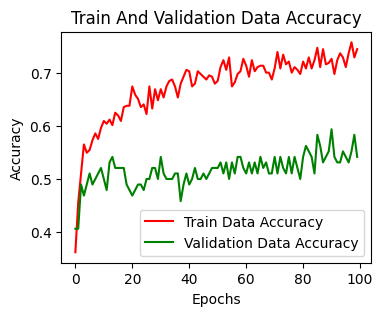

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.58      0.78      0.66       103
     Class 1       0.91      0.88      0.89       106
     Class 2       0.81      0.66      0.73       175

    accuracy                           0.75       384
   macro avg       0.77      0.77      0.76       384
weighted avg       0.78      0.75      0.76       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.52      0.59      0.55        39
     Class 1       0.75      0.57      0.65        21
     Class 2       0.47      0.47      0.47        36

    accuracy                           0.54        96
   macro avg       0.58      0.54      0.56        96
weighted avg       0.55      0.54      0.54        96



### Confusion Matrix

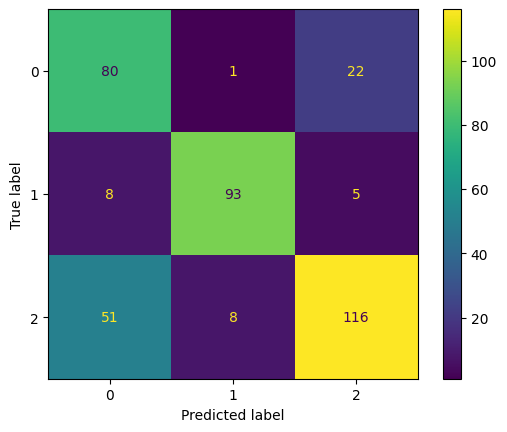

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

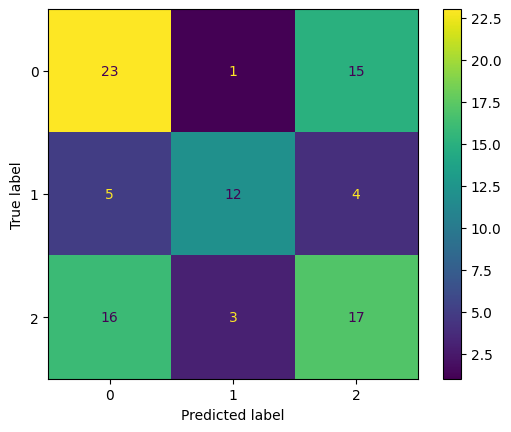

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Tanh-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 5s 53ms/step - loss: 1.0485 - sparse_categorical_accuracy: 0.4922 - val_loss: 0.9841 - val_sparse_categorical_accuracy: 0.4792
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.8942 - sparse_categorical_accuracy: 0.5417 - val_loss: 0.9932 - val_sparse_categorical_accuracy: 0.4583
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 0.8028 - sparse_categorical_accuracy: 0.6406 - val_loss: 0.9884 - val_sparse_categorical_accuracy: 0.4792
Epoch 4/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7515 - sparse_categorical_accuracy: 0.6589 - val_loss: 0.9686 - val_sparse_categorical_accuracy: 0.4792
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7242 - sparse_categorical_accuracy: 0.6797 - val_loss: 0.9626 - val_sparse_categorical_accuracy: 0.4479
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.6797 - sparse_categorica

### Loss and Accuracy Diagrams

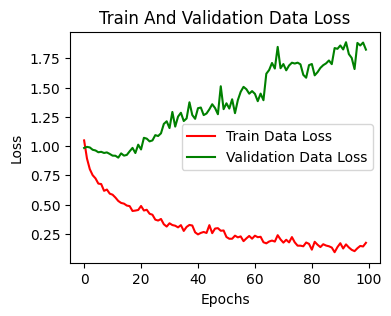

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

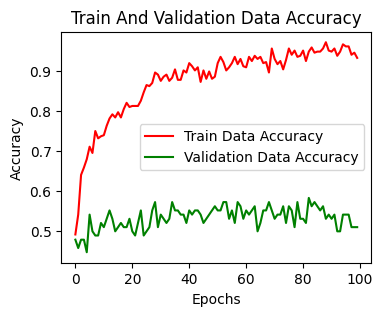

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97       103
     Class 1       1.00      0.99      1.00       106
     Class 2       0.99      0.98      0.99       175

    accuracy                           0.98       384
   macro avg       0.98      0.99      0.98       384
weighted avg       0.98      0.98      0.98       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.57      0.44      0.49        39
     Class 1       0.61      0.67      0.64        21
     Class 2       0.42      0.50      0.46        36

    accuracy                           0.51        96
   macro avg       0.53      0.53      0.53        96
weighted avg       0.52      0.51      0.51        96



### Confusion Matrix

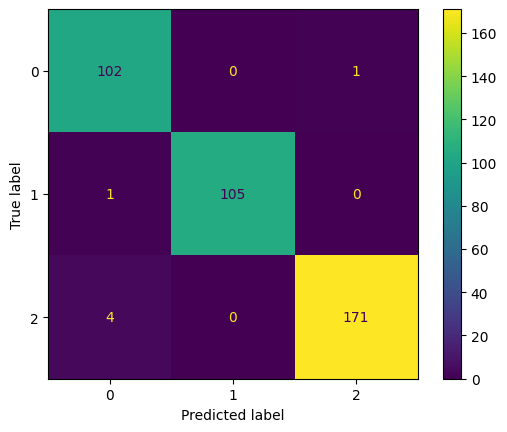

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

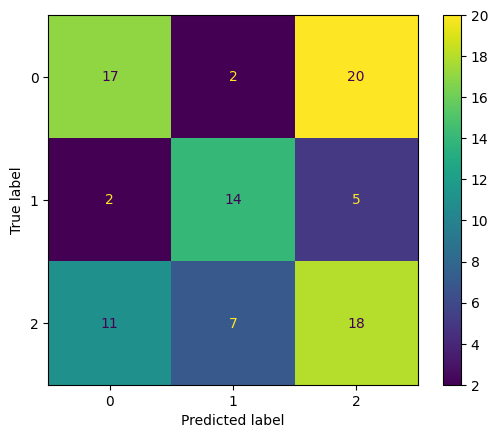

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Tanh-5HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="tanh"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 11s 277ms/step - loss: 1.3105 - sparse_categorical_accuracy: 0.4401 - val_loss: 1.0528 - val_sparse_categorical_accuracy: 0.3958
Epoch 2/100
12/12 [==============================] - 0s 27ms/step - loss: 0.9916 - sparse_categorical_accuracy: 0.5130 - val_loss: 1.0531 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 0.8791 - sparse_categorical_accuracy: 0.5755 - val_loss: 1.0600 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 35ms/step - loss: 0.8564 - sparse_categorical_accuracy: 0.5990 - val_loss: 1.0599 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 35ms/step - loss: 0.8224 - sparse_categorical_accuracy: 0.6146 - val_loss: 1.0765 - val_sparse_categorical_accuracy: 0.3854
Epoch 6/100
12/12 [==============================] - 0s 37ms/step - loss: 0.7767 - sparse_categori

### Loss and Accuracy Diagrams

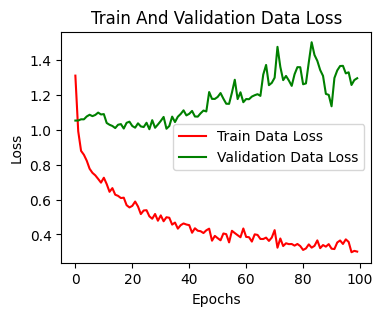

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

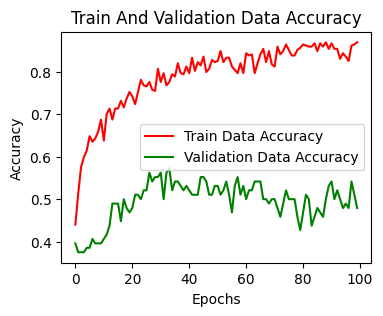

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.77      0.90      0.83       103
     Class 1       0.99      0.96      0.98       106
     Class 2       0.92      0.84      0.88       175

    accuracy                           0.89       384
   macro avg       0.89      0.90      0.89       384
weighted avg       0.90      0.89      0.89       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.48      0.31      0.38        39
     Class 1       0.71      0.71      0.71        21
     Class 2       0.38      0.53      0.44        36

    accuracy                           0.48        96
   macro avg       0.52      0.52      0.51        96
weighted avg       0.49      0.48      0.47        96



### Confusion Matrix

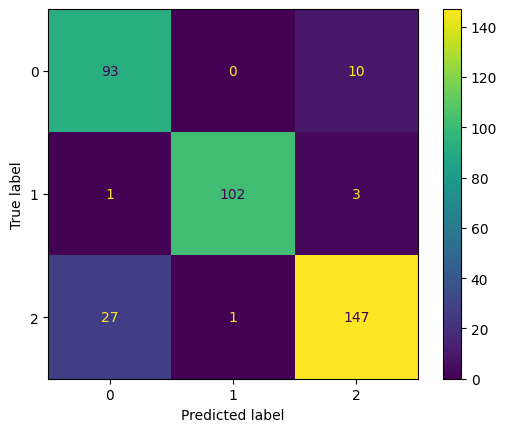

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

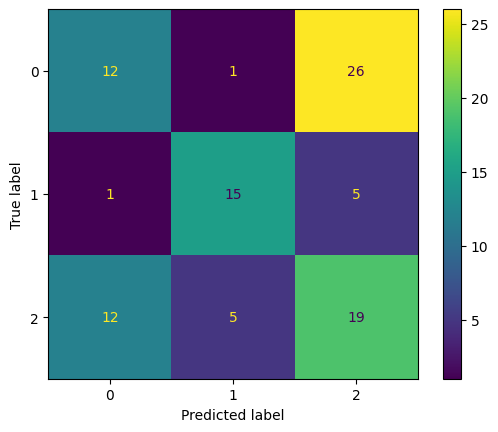

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

# ***Adam-Sigmoid-Implementation***

##***Adam-Sigmoid-3HiddentLayers***

###Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 41ms/step - loss: 1.0855 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.0953 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0701 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1045 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0678 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1171 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0687 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1059 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 1.0674 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1146 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0666 - sparse_categorica

###Loss and Accuracy Diagram

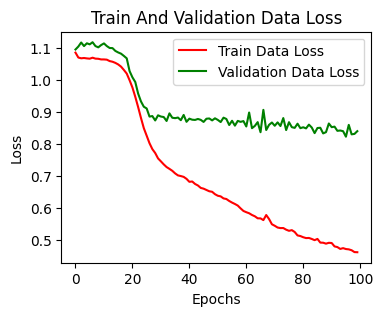

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

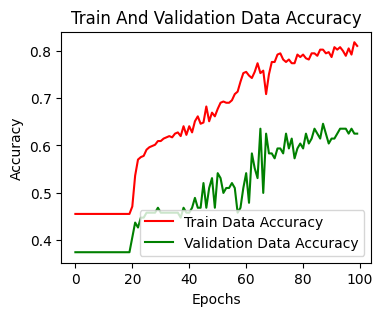

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.70      0.69      0.69       103
     Class 1       0.92      0.98      0.95       106
     Class 2       0.80      0.77      0.78       175

    accuracy                           0.81       384
   macro avg       0.81      0.81      0.81       384
weighted avg       0.80      0.81      0.81       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.69      0.51      0.59        39
     Class 1       0.83      0.71      0.77        21
     Class 2       0.51      0.69      0.59        36

    accuracy                           0.62        96
   macro avg       0.68      0.64      0.65        96
weighted avg       0.65      0.62      0.63        96



### Confusion Matrix

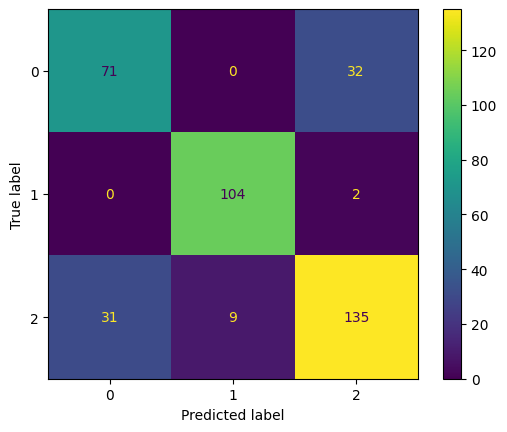

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

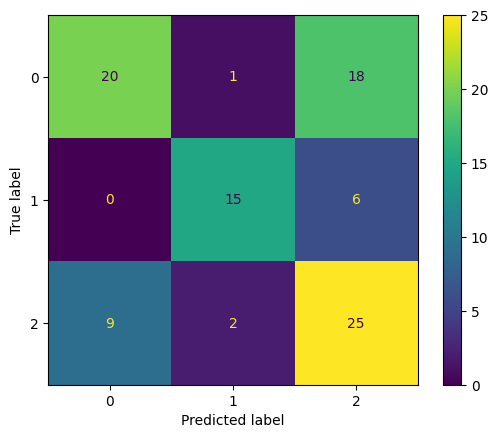

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Sigmoid-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(50, activation="sigmoid"),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 39ms/step - loss: 1.0795 - sparse_categorical_accuracy: 0.4401 - val_loss: 1.1177 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0755 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1365 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0658 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1038 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0687 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1005 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0664 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1048 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0666 - sparse_categorical

###Loss and Accuracy Diagram

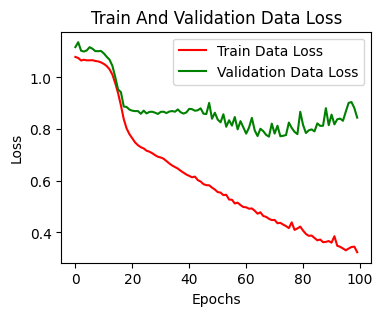

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

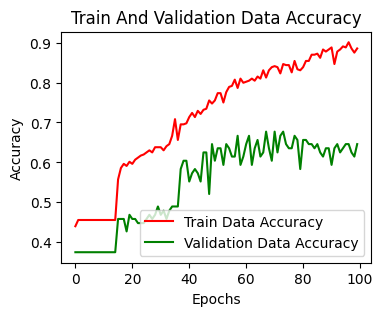

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.78      0.95      0.86       103
     Class 1       0.96      0.97      0.97       106
     Class 2       0.95      0.82      0.88       175

    accuracy                           0.90       384
   macro avg       0.90      0.92      0.90       384
weighted avg       0.91      0.90      0.90       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.69      0.56      0.62        39
     Class 1       0.94      0.71      0.81        21
     Class 2       0.52      0.69      0.60        36

    accuracy                           0.65        96
   macro avg       0.72      0.66      0.68        96
weighted avg       0.68      0.65      0.65        96



### Confussion Matrix

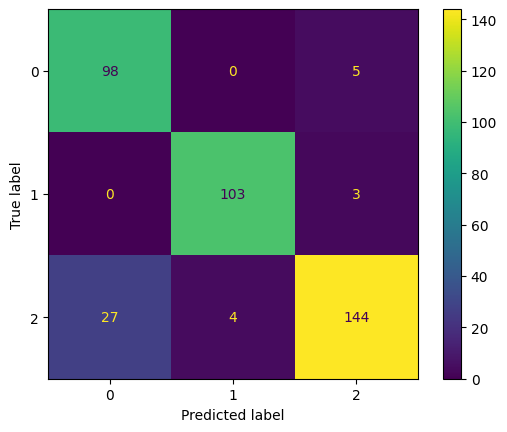

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

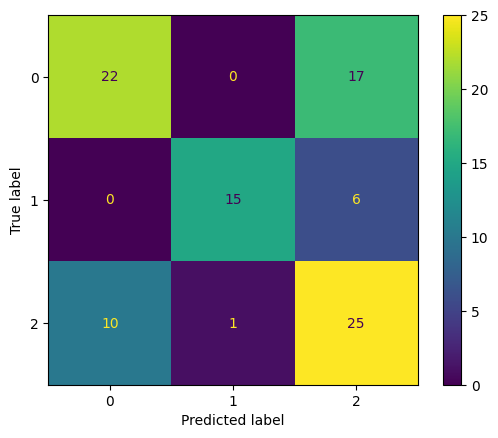

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Sigmoid-5HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 5s 62ms/step - loss: 1.3746 - sparse_categorical_accuracy: 0.2760 - val_loss: 1.2745 - val_sparse_categorical_accuracy: 0.2188
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 1.3096 - sparse_categorical_accuracy: 0.2760 - val_loss: 1.2251 - val_sparse_categorical_accuracy: 0.2188
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 1.2517 - sparse_categorical_accuracy: 0.2760 - val_loss: 1.1842 - val_sparse_categorical_accuracy: 0.2188
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 1.2013 - sparse_categorical_accuracy: 0.2760 - val_loss: 1.1536 - val_sparse_categorical_accuracy: 0.2188
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 1.1636 - sparse_categorical_accuracy: 0.2760 - val_loss: 1.1307 - val_sparse_categorical_accuracy: 0.2188
Epoch 6/100
12/12 [==============================] - 0s 31ms/step - loss: 1.1332 - sparse_categorica

### Loss and Accuracy Diagram

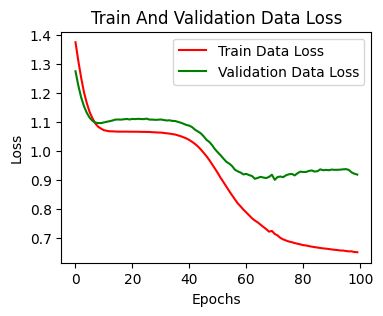

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

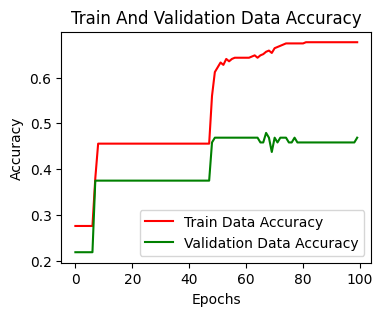

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       103
     Class 1       0.84      0.97      0.90       106
     Class 2       0.60      0.90      0.72       175

    accuracy                           0.68       384
   macro avg       0.48      0.62      0.54       384
weighted avg       0.51      0.68      0.58       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        39
     Class 1       0.65      0.81      0.72        21
     Class 2       0.40      0.78      0.53        36

    accuracy                           0.47        96
   macro avg       0.35      0.53      0.42        96
weighted avg       0.29      0.47      0.36        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

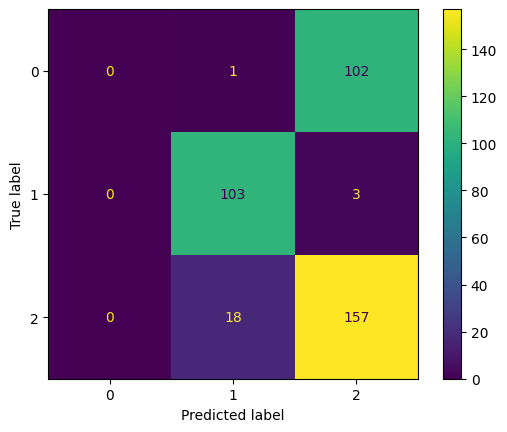

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

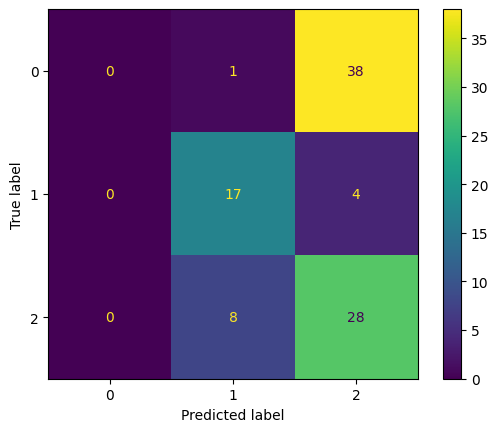

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Sigmoid-Dropout-3HiddentLayers***

###Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 40ms/step - loss: 1.1086 - sparse_categorical_accuracy: 0.3854 - val_loss: 1.1088 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 1.0938 - sparse_categorical_accuracy: 0.4141 - val_loss: 1.1234 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0883 - sparse_categorical_accuracy: 0.4219 - val_loss: 1.1103 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 1.1150 - sparse_categorical_accuracy: 0.4167 - val_loss: 1.1063 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1.1206 - sparse_categorical_accuracy: 0.4062 - val_loss: 1.1061 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 1.1198 - sparse_categorica

###Loss and Accuracy Diagram

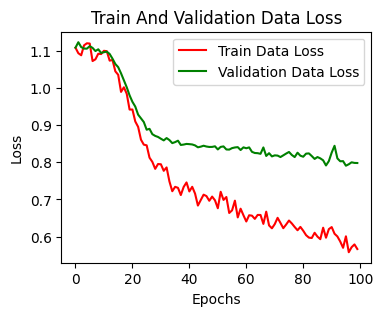

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

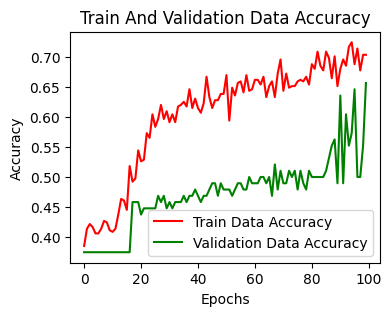

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.71      0.56      0.63       103
     Class 1       0.90      0.95      0.93       106
     Class 2       0.74      0.81      0.77       175

    accuracy                           0.78       384
   macro avg       0.78      0.77      0.78       384
weighted avg       0.78      0.78      0.78       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.83      0.51      0.63        39
     Class 1       0.75      0.71      0.73        21
     Class 2       0.54      0.78      0.64        36

    accuracy                           0.66        96
   macro avg       0.71      0.67      0.67        96
weighted avg       0.70      0.66      0.66        96



###Confusion Matrix

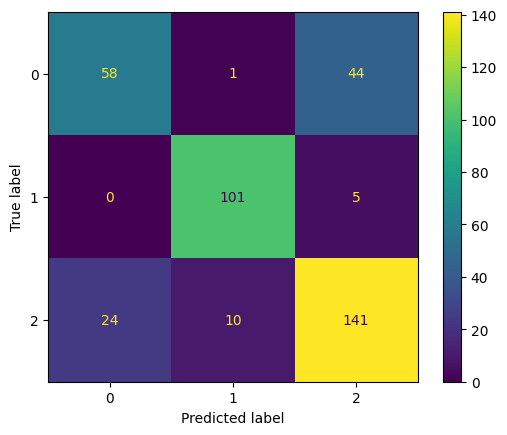

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

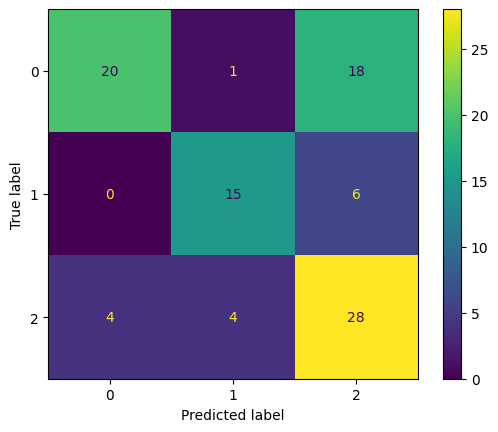

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Sigmoid-Dropout-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 41ms/step - loss: 1.2227 - sparse_categorical_accuracy: 0.3724 - val_loss: 1.1488 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.1255 - sparse_categorical_accuracy: 0.3542 - val_loss: 1.1168 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.1015 - sparse_categorical_accuracy: 0.4141 - val_loss: 1.0779 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0834 - sparse_categorical_accuracy: 0.3984 - val_loss: 1.0784 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9845 - sparse_categorical_accuracy: 0.4974 - val_loss: 0.9460 - val_sparse_categorical_accuracy: 0.4167
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8548 - sparse_categorical_a

###Loss and Accuracy Diagrams

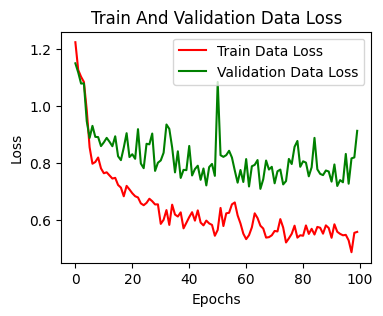

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

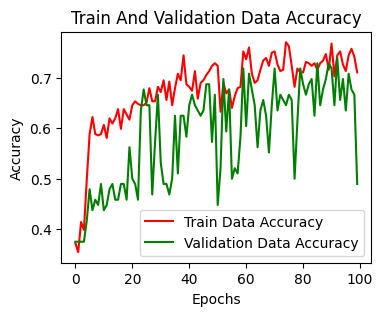

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.95      0.17      0.30       103
     Class 1       0.83      0.99      0.91       106
     Class 2       0.64      0.87      0.74       175

    accuracy                           0.72       384
   macro avg       0.81      0.68      0.65       384
weighted avg       0.78      0.72      0.67       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.67      0.05      0.10        39
     Class 1       0.70      0.76      0.73        21
     Class 2       0.41      0.81      0.55        36

    accuracy                           0.49        96
   macro avg       0.59      0.54      0.46        96
weighted avg       0.58      0.49      0.40        96



### confusion matrix

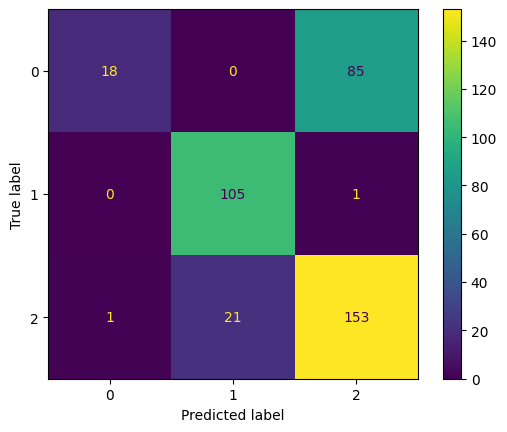

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

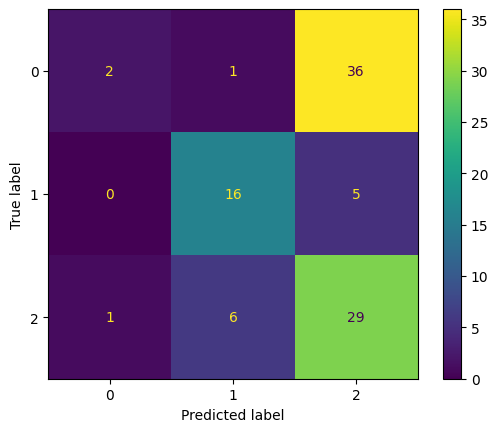

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Adam-Sigmoid-Dropout-5HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 2s 27ms/step - loss: 1.1440 - sparse_categorical_accuracy: 0.3932 - val_loss: 1.1536 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.1006 - sparse_categorical_accuracy: 0.4193 - val_loss: 1.1231 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.1056 - sparse_categorical_accuracy: 0.4505 - val_loss: 1.0917 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0662 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.1111 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0981 - sparse_categorical_accuracy: 0.4297 - val_loss: 1.1016 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0343 - sparse_categorical_ac

### Loss and Accuracy Diagrams

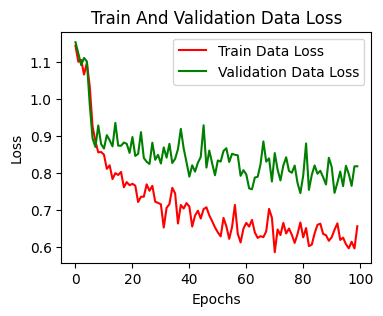

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

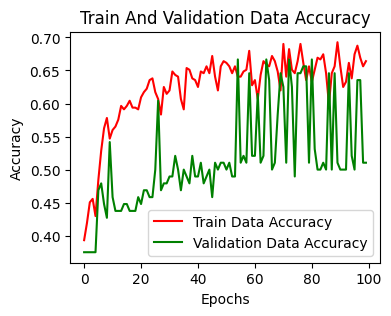

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       103
     Class 1       0.93      0.94      0.93       106
     Class 2       0.61      0.95      0.74       175

    accuracy                           0.70       384
   macro avg       0.51      0.63      0.56       384
weighted avg       0.53      0.70      0.60       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        39
     Class 1       0.88      0.71      0.79        21
     Class 2       0.43      0.94      0.59        36

    accuracy                           0.51        96
   macro avg       0.44      0.55      0.46        96
weighted avg       0.35      0.51      0.39        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Confussion Matrix

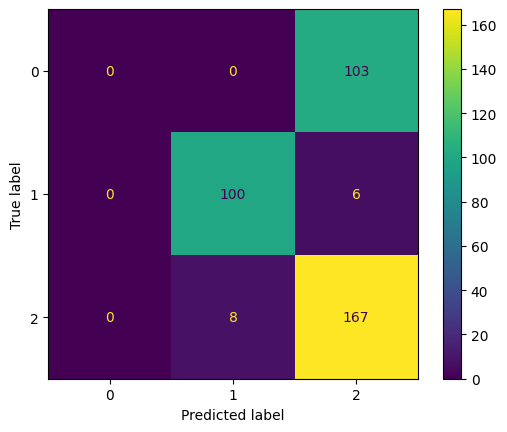

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

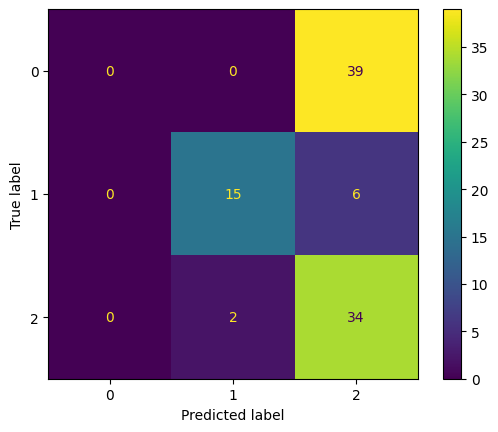

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Sigmoid-3HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 32ms/step - loss: 1.3512 - sparse_categorical_accuracy: 0.3464 - val_loss: 1.2179 - val_sparse_categorical_accuracy: 0.2188
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0483 - sparse_categorical_accuracy: 0.4635 - val_loss: 1.2022 - val_sparse_categorical_accuracy: 0.2188
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9091 - sparse_categorical_accuracy: 0.5391 - val_loss: 1.1924 - val_sparse_categorical_accuracy: 0.2188
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8483 - sparse_categorical_accuracy: 0.5729 - val_loss: 1.1810 - val_sparse_categorical_accuracy: 0.2188
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8341 - sparse_categorical_accuracy: 0.5807 - val_loss: 1.1724 - val_sparse_categorical_accuracy: 0.2188
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8082 - sparse_categorical_acc

### Loss and Accuracy Diagrams

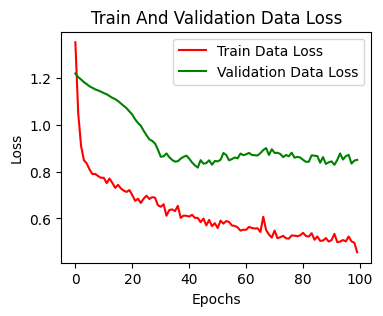

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

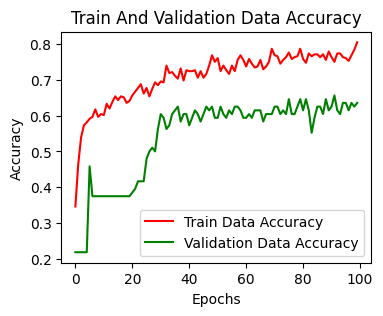

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.69      0.72      0.70       103
     Class 1       0.87      0.93      0.90       106
     Class 2       0.81      0.75      0.78       175

    accuracy                           0.79       384
   macro avg       0.79      0.80      0.80       384
weighted avg       0.79      0.79      0.79       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.63      0.67      0.65        39
     Class 1       0.71      0.81      0.76        21
     Class 2       0.58      0.50      0.54        36

    accuracy                           0.64        96
   macro avg       0.64      0.66      0.65        96
weighted avg       0.63      0.64      0.63        96



### Confusion Matrix

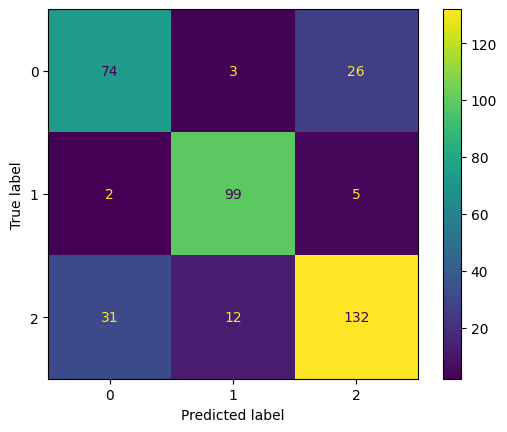

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

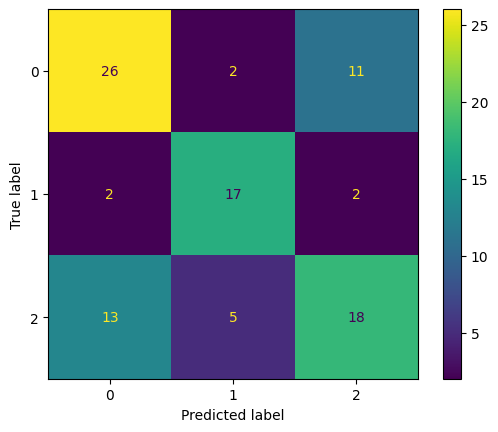

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Sigmoid-4HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 3s 33ms/step - loss: 1.1375 - sparse_categorical_accuracy: 0.4531 - val_loss: 1.0717 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8477 - sparse_categorical_accuracy: 0.5677 - val_loss: 1.0748 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7617 - sparse_categorical_accuracy: 0.6510 - val_loss: 1.0787 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7510 - sparse_categorical_accuracy: 0.6667 - val_loss: 1.0875 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7277 - sparse_categorical_accuracy: 0.6615 - val_loss: 1.0938 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6920 - sparse_categorical_

### Loss and Accuracy Diagrams

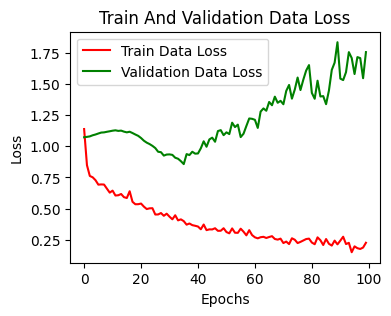

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

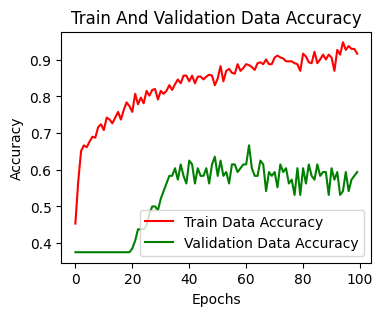

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.94      0.91      0.93       103
     Class 1       0.99      0.98      0.99       106
     Class 2       0.94      0.97      0.95       175

    accuracy                           0.96       384
   macro avg       0.96      0.95      0.96       384
weighted avg       0.96      0.96      0.96       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.77      0.44      0.56        39
     Class 1       0.75      0.57      0.65        21
     Class 2       0.48      0.78      0.60        36

    accuracy                           0.59        96
   macro avg       0.67      0.60      0.60        96
weighted avg       0.66      0.59      0.59        96



### Confusion Matrix

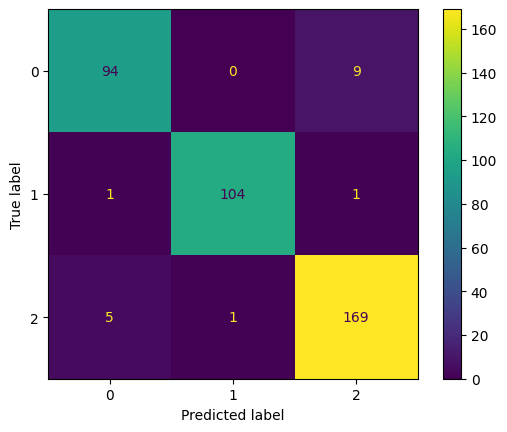

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

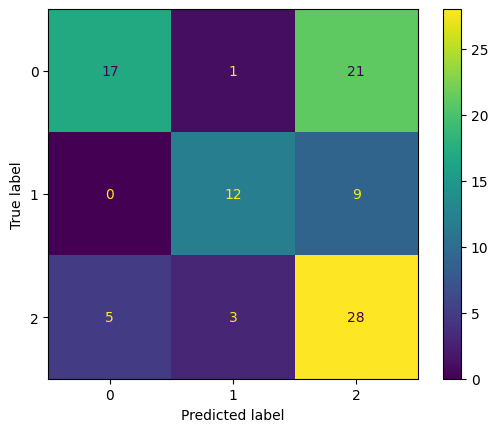

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

## ***Batch-Norm-Adam-Sigmoid-5HiddentLayers***

### Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation="sigmoid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 5s 38ms/step - loss: 1.1464 - sparse_categorical_accuracy: 0.4714 - val_loss: 1.3195 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.8718 - sparse_categorical_accuracy: 0.5625 - val_loss: 1.3187 - val_sparse_categorical_accuracy: 0.3750
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.8123 - sparse_categorical_accuracy: 0.6042 - val_loss: 1.3192 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7728 - sparse_categorical_accuracy: 0.6328 - val_loss: 1.3201 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.7398 - sparse_categorical_accuracy: 0.6380 - val_loss: 1.3190 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7152 - sparse_categorica

### Loss and Accuracy Diagrams

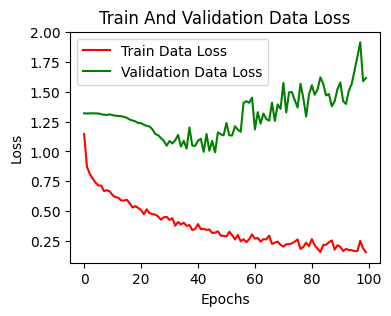

In [ ]:
from sqlalchemy import label
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

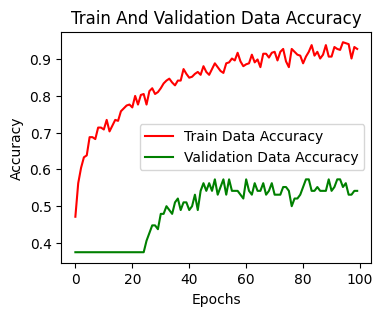

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Accuracy")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Accuracy')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       1.00      0.87      0.93       103
     Class 1       0.99      0.99      0.99       106
     Class 2       0.93      0.99      0.96       175

    accuracy                           0.96       384
   macro avg       0.97      0.95      0.96       384
weighted avg       0.96      0.96      0.96       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_test = y_val
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_test, y_pred_classification_test, target_names=target_names))

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.60      0.31      0.41        39
     Class 1       0.88      0.67      0.76        21
     Class 2       0.43      0.72      0.54        36

    accuracy                           0.54        96
   macro avg       0.64      0.57      0.57        96
weighted avg       0.60      0.54      0.53        96



### Confusion Matrix

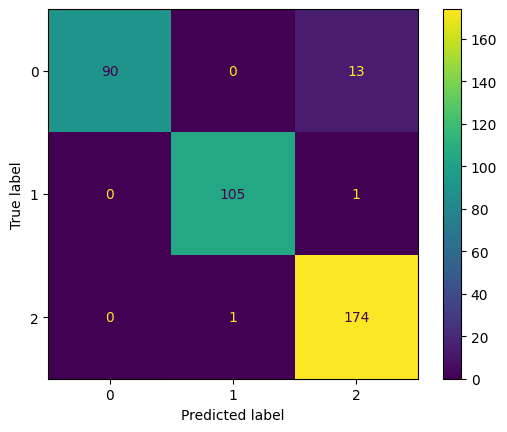

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

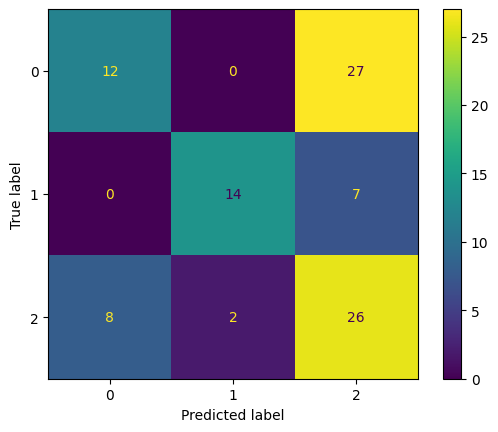

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

# ***Implementing a Model***

## ***Model***

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, input_shape=(16,), activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(40,  activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(35, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3,  activation="softmax")
])
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
12/12 [==============================] - 6s 41ms/step - loss: 1.4098 - sparse_categorical_accuracy: 0.3750 - val_loss: 1.0695 - val_sparse_categorical_accuracy: 0.4062
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.3724 - sparse_categorical_accuracy: 0.3281 - val_loss: 1.0658 - val_sparse_categorical_accuracy: 0.4062
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.3610 - sparse_categorical_accuracy: 0.3750 - val_loss: 1.0655 - val_sparse_categorical_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 1.3172 - sparse_categorical_accuracy: 0.3724 - val_loss: 1.0675 - val_sparse_categorical_accuracy: 0.3750
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 1.2848 - sparse_categorical_accuracy: 0.4062 - val_loss: 1.0705 - val_sparse_categorical_accuracy: 0.3750
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 1.2733 - sparse_categorical_a

## ***Loss and Accuracy Diagrams***

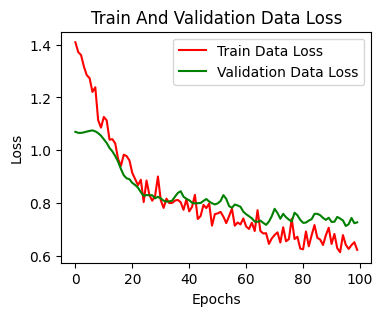

In [ ]:
#Loss Diagram
train_loss = history.history['loss']
val_loss = history.history['val_loss']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_loss, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_loss, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

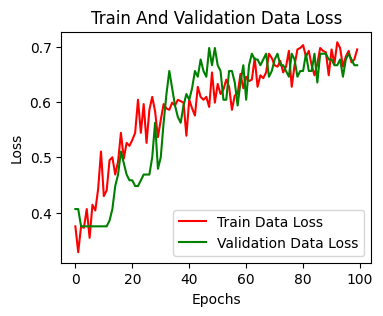

In [ ]:
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
iterations = range(0, 100)

fig = plt.figure(figsize = (4, 3))
plt.title("Train And Validation Data Loss")
plt.plot(iterations, train_acc, 'r', label = 'Train Data Loss')
plt.plot(iterations, val_acc, 'g', label = 'Validation Data Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ***Classification Report***

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classification_train = [np.argmax(element) for element in y_pred_train]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.63      0.85      0.72       103
     Class 1       0.89      0.95      0.92       106
     Class 2       0.85      0.63      0.73       175

    accuracy                           0.78       384
   macro avg       0.79      0.81      0.79       384
weighted avg       0.80      0.78      0.78       384



In [ ]:
y_pred_test = model.predict(X_val)
y_pred_classification_test = [np.argmax(element) for element in y_pred_test]
y_true_train = y_train
target_names=['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_true_train, y_pred_classification_train, target_names=target_names))

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.63      0.85      0.72       103
     Class 1       0.89      0.95      0.92       106
     Class 2       0.85      0.63      0.73       175

    accuracy                           0.78       384
   macro avg       0.79      0.81      0.79       384
weighted avg       0.80      0.78      0.78       384



## ***Confusion Matrix***

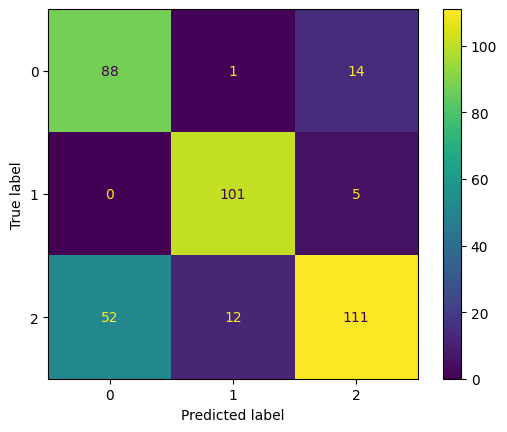

In [ ]:
actual_train = y_train
predicted_train = y_pred_classification_train
confusion_matrix = metrics.confusion_matrix(actual_train, predicted_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()

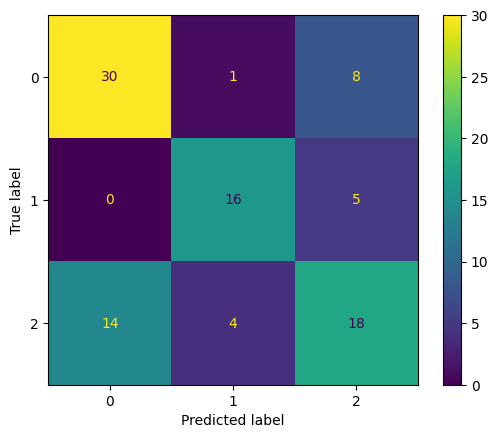

In [ ]:
actual_test = y_val
predicted_test = y_pred_classification_test
confusion_matrix = metrics.confusion_matrix(actual_test, predicted_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

cm_display.plot()
plt.show()